# 百度悦读大赛

作为南京大学和百度双创大数据平台建设的重要项目之一，“全国大学生悦读挑战赛”为国内首个参与规模最大的创新阅读大赛，率先开创读书时长PK+优质书评PK全新模式，用技术改革传统阅读。据悉，本次大赛时间从2016年11月10日到12月20日，覆盖全国1000多所院校的1000万大学生。大赛通过线上“读书时长PK”、“书评赢大奖”及“在线听书”等多种形式，倡导健康阅读，利用碎片化时间多次阅读。据统计，在过去一个多月的时间里，针对南大专家、师生推选出的60本经典书目，借由百度的大数据和人工智能技术与百度阅读平台，大赛共吸引了30万人次参加，累计读书时长达13.95亿秒，产出书评近5000条，优秀书评1000多条。经过40天的阅读时长pk和优质书评PK，最终16位获奖选手从30万人次中脱颖而出。特等奖得主为云南财经大学的杨月潇，他的阅读时长达到85万秒，相当于平均每天阅读6个小时。http://news.nju.edu.cn/show_article_4_44895


# 数据

- 1.销售数据doc_datas.txt
    - 各项数据为，图书名，图书ID，用户ID，购买时间，购买价格
- 2.兑换劵兑换数据voucher.zip
    - 各项数据为，图书名，图书ID，用户ID，兑换时间
- 3.行为数据data2.zip
    - 各文件按照日期命名data-{date}
    - 各项数据为，用户名，用户行为编号，触发时间（可能有错误），端（1 ipad,2 iphone,3android)
- 4.阅读数据data.zip
    - 各文件夹按照日期命名
    - 各项数据为，用户ID，行为编号（只有1098），阅读时长(毫秒)，触发时间，图书ID，端（1 ipad,2 iphone,3androd）
- 5.图书数据book.txt
    - 各项数据为，图书ID，书名

In [4]:
55000+12000*4 + 50500 + 36000

189500

In [1]:
%matplotlib inline
import sys
import pandas as pd
from collections import Counter, defaultdict
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体  

In [4]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()


# 为了确保中文可以在matplotlib里正确显示
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 
# 需要确定系统安装了Microsoft YaHei

In [40]:
def alloRegressPlot(xdata,ydata,col,mark,xlab,ylab, loglog):
    x=np.log(xdata+1);y=np.log(ydata+1);
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant=res.params[0];beta=res.params[1]; r2=res.rsquared
    plt.plot(xdata,ydata,mark,color=col, label = None)
    if loglog == True:
        plt.xscale('log');plt.yscale('log')
    plt.xlabel(xlab);plt.ylabel(ylab)
    minx,maxx=plt.xlim(); miny,maxy=plt.ylim()
    xs = np.linspace(min(xdata),max(xdata),100)
    plt.plot(xs,np.exp(constant)*xs**beta,color='r',linestyle='-', 
            label = '$\\alpha$ = '+ str(np.round(beta,2)) + ' , ' \
         + '$R^2$ = ' + str(np.round(r2,2)))
    plt.legend(loc = 0)

def linearRegressPlot(xdata,ydata,col,mark,xlab,ylab):
    x=xdata;y=ydata
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant=res.params[0];beta=res.params[1]; r2=res.rsquared
    plt.plot(xdata,ydata,mark,color=col)
    plt.xlabel(xlab);plt.ylabel(ylab)
    minx,maxx=plt.xlim(); miny,maxy=plt.ylim()
    plt.text(min(xdata)+(max(xdata)-min(xdata))/10,
         min(ydata)+(max(ydata)-min(ydata))/2,
         '$\\alpha$ = '+ str(np.round(beta,2)) + ' , ' \
         + '$R^2$ = ' + str(np.round(r2,2)) )
    xs = np.linspace(min(xdata),max(xdata),100)
    plt.plot(xs,constant + xs*beta,color='r',linestyle='-')

## 销售数据 doc_datas.txt
- 各项数据为，图书名，图书ID，用户ID，购买时间，购买价格

In [119]:
sell_df = pd.read_csv('/Users/chengjun/bigdata/BaiduYueduData/doc_datas.txt', encoding = 'gb18030',
                     delimiter='\t', names = ['book', 'id', 'user', 'buy_time', 'price'])

In [120]:
sell_df = sell_df.dropna()
len(sell_df)

274770

In [121]:
buy_time = [datetime.datetime.strptime(str(i), '%Y%m%d.0') for i in sell_df.buy_time.tolist()]
sell_df['buy_time'] = buy_time

In [122]:
sell_df.head()

,book,id,user,buy_time,price
0,秀色锦园之最强农家女,31027f67ce2f0066f53322ba,1.865646e+09,2016-10-01,6.97
1,暖妻成瘾,34d0f4af25c52cc58ad6be71,9.944218e+08,2016-10-01,1.11
2,被遗忘的时光,cd85d2c765ce050877321369,2.645515e+09,2016-10-01,1.00
3,军婚难耐,87972e2eba0d4a7303763a54,2.569947e+09,2016-10-01,0.86
4,一品医妃,78fb82d3eefdc8d377ee32c0,2.732712e+09,2016-10-01,0.43


In [123]:
days = list(set(sell_df['buy_time']))

user_sell_list = []

for i in days:
    ds = sell_df[sell_df['buy_time'] == i]
    user_num = len(set(ds['user']))
    sell_num = len(ds)
    user_sell_list.append([user_num, sell_num])

user_num, sell_num  = np.array(user_sell_list).T

In [124]:
matplotlib.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

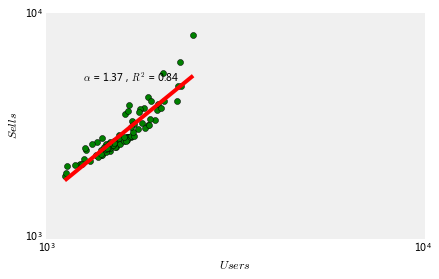

In [125]:
alloRegressPlot(user_num, sell_num, 'green', 'o', '$Users$', '$Sells$', loglog = True)

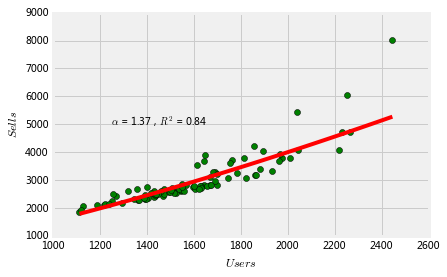

In [126]:
alloRegressPlot(user_num, sell_num, 'green', 'o', '$Users$', '$Sells$', loglog = False)

In [75]:
len(set(sell_df.id)), len(set(sell_df.user)), np.sum(sell_df.price), np.sum(sell_df.price)/len(set(sell_df.user))

(21550, 36800, 982036.6299997334, 26.685777989123192)

36801个读者产生了274771次书籍购买行为，共计21551本书, 消费共计982036元, 人均26.7元。

In [127]:
ts = sell_df.groupby('buy_time').size()

In [128]:
ts[ts==np.max(ts)]

buy_time
2016-11-11    8022
dtype: int64

In [132]:
ts.index

DatetimeIndex(['2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04',
               '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08',
               '2016-10-09', '2016-10-10', '2016-10-11', '2016-10-12',
               '2016-10-13', '2016-10-14', '2016-10-15', '2016-10-16',
               '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20',
               '2016-10-21', '2016-10-22', '2016-10-23', '2016-10-24',
               '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28',
               '2016-10-29', '2016-10-30', '2016-10-31', '2016-11-01',
               '2016-11-02', '2016-11-03', '2016-11-04', '2016-11-05',
               '2016-11-06', '2016-11-07', '2016-11-08', '2016-11-09',
               '2016-11-10', '2016-11-11', '2016-11-12', '2016-11-13',
               '2016-11-14', '2016-11-15', '2016-11-16', '2016-11-17',
               '2016-11-18', '2016-11-19', '2016-11-20', '2016-11-21',
               '2016-11-22', '2016-11-23', '2016-11-24', '2016-11-25',
      

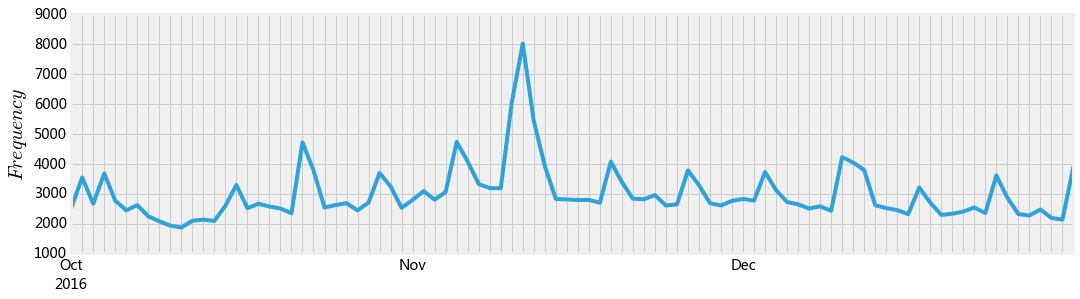

In [134]:
matplotlib.style.use('fivethirtyeight')

fig = plt.figure(figsize=(16, 4),facecolor='white')
ts.plot(xticks = list(ts.index))
plt.axvline(x = datetime.datetime.strptime('20161111', '%Y%m%d'), ymin = 1000, ymax = 9000, color='r')  
plt.xlabel('')
plt.ylabel(u'$Frequency$', fontsize = 20)
plt.show()

2016-11-11 双十一（周六）的时候销量最高，具有明显的周末效应，周末达到峰值。

In [22]:
book_freq = defaultdict(int)
for i in sell_df.book:
    book_freq[i]+=1

In [31]:
book_freq_df = pd.DataFrame(book_freq.items(), columns = ['book', 'freq'])
book_freq_df = book_freq_df.sort_values(["freq"],ascending=False)

In [39]:
book_freq_df[:10]

,book,freq
7216,暖妻成瘾,4779
11629,诱妻入怀：前夫，请温柔,2890
3556,官场局中局,2740
9821,妾色,2248
12223,一号红人,2091
10497,闪婚厚爱：误嫁天价老公,2074
11405,闪婚总裁契约妻,1942
1078,霸娶之婚后宠爱,1849
14097,《最强升级系统》,1824
402,重生溺宠冥王妃,1751


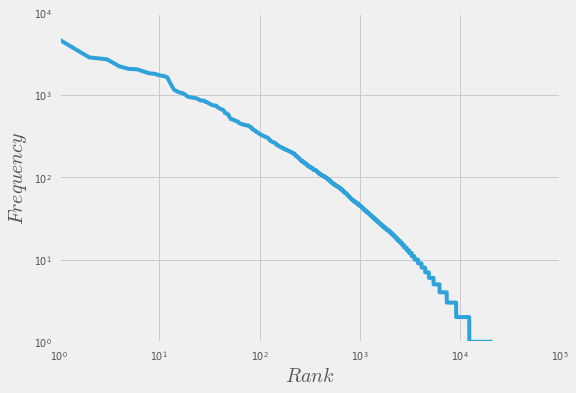

In [156]:
freq_rank = range(1, len(book_freq_df)+1)
freq = book_freq_df.freq
plt.plot(freq_rank, freq)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$Rank$', fontsize = 20)
plt.ylabel('$Frequency$', fontsize = 20)
plt.show()

## 兑换劵兑换数据 voucher

各项数据为，图书名，图书ID，用户ID，兑换时间


In [135]:
vouch_df = pd.read_csv('/Users/chengjun/bigdata/BaiduYueduData/voucher_datas.txt', encoding = 'gb18030',
                     delimiter='\t', names = ['book', 'book_id', 'user', 'time'])

In [136]:
vouch_df.head()

,book,book_id,user,time
0,想入非非,c2c8b12d69eae009591bec2a,1.418279e+09,20161001.0
1,每天学点医学常识,f677c67e5ef7ba0d4b733b70,2.520749e+09,20161001.0
2,你变了，世界就变了,b9cb5f51f90f76c661371ac5,7.481791e+08,20161001.0
3,边城,083d6f779b6648d7c0c74605,7.481791e+08,20161001.0
4,契约军婚,6e09abc755270722192ef7d8,2.607105e+09,20161001.0


In [137]:
vouch_df = vouch_df.dropna()
len(vouch_df)

1547220

In [138]:
days = list(set(vouch_df['time']))

user_vouch_list = []

for i in days:
    ds = vouch_df[vouch_df['time'] == i]
    user_num = len(set(ds['user']))
    vouch_num = len(ds)
    user_vouch_list.append([user_num, vouch_num])

user_num, vouch_num  = np.array(user_vouch_list).T

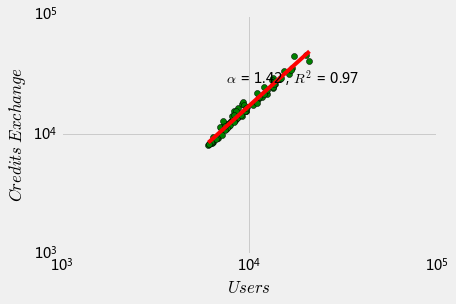

In [139]:
alloRegressPlot(user_num, vouch_num, 'green', 'o', '$Users$', '$Credits\;Exchange$', loglog = True)

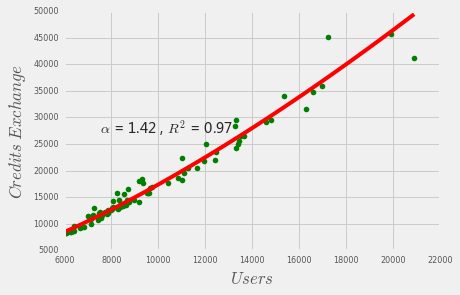

In [318]:
alloRegressPlot(user_num, vouch_num, 'green', 'o', '$Users$', '$Credits\;Exchange$', loglog = False)

In [160]:
len(vouch_df), len(set(vouch_df.book_id)), len(set(vouch_df.user))

(1547221, 36205, 127969)

In [146]:
sell_df.groupby('book')

In [151]:
book_frq = sell_df.groupby('book').size()

book_frq.sort(ascending=False)

In [154]:
book_frq[:10]

book
暖妻成瘾           4779
诱妻入怀：前夫，请温柔    2890
官场局中局          2740
妾色             2248
一号红人           2091
闪婚厚爱：误嫁天价老公    2074
闪婚总裁契约妻        1942
霸娶之婚后宠爱        1849
《最强升级系统》       1824
重生溺宠冥王妃        1751
dtype: int64

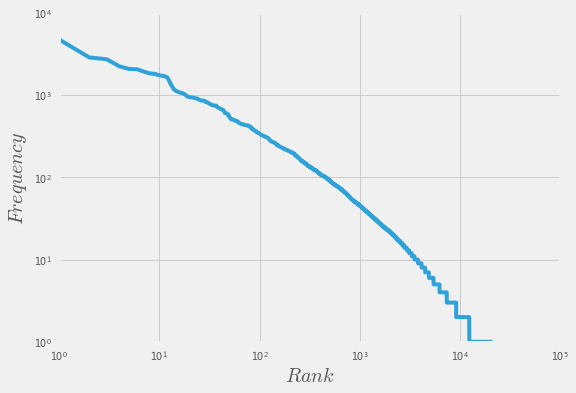

In [155]:
freq_rank = range(1, len(book_frq)+1)
plt.plot(freq_rank, book_frq)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$Rank$', fontsize = 20)
plt.ylabel('$Frequency$', fontsize = 20)
plt.show()

In [140]:
vouch_time = [datetime.datetime.strptime(str(i), '%Y%m%d.0') for i in vouch_df.time.tolist()]
vouch_df['time'] = vouch_time

In [141]:
ts = vouch_df.groupby('time').size()

In [146]:
ts

time
2016-10-01    31657
2016-10-02    34702
2016-10-03    29445
2016-10-04    45712
2016-10-05    34042
2016-10-06    29480
2016-10-07    45221
2016-10-08    22326
2016-10-09    14193
2016-10-10    11503
2016-10-11    12946
2016-10-12    15694
2016-10-13    16589
2016-10-14    15561
2016-10-15    24955
2016-10-16    28419
2016-10-17    18051
2016-10-18    18482
2016-10-19    17645
2016-10-20    14469
2016-10-21    11714
2016-10-22    26470
2016-10-23    16655
2016-10-24     9565
2016-10-25    11244
2016-10-26    12187
2016-10-27    11693
2016-10-28    11139
2016-10-29    21905
2016-10-30    15797
              ...  
2016-12-02    14154
2016-12-03    20555
2016-12-04    15782
2016-12-05    11558
2016-12-06    11923
2016-12-07    11226
2016-12-08    11332
2016-12-09    10775
2016-12-10    25067
2016-12-11    18534
2016-12-12    15764
2016-12-13     8575
2016-12-14     8211
2016-12-15     8248
2016-12-16     8746
2016-12-17    18226
2016-12-18    12743
2016-12-19     8452
2016-12-20     

In [145]:
ts.index

DatetimeIndex(['2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04',
               '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08',
               '2016-10-09', '2016-10-10', '2016-10-11', '2016-10-12',
               '2016-10-13', '2016-10-14', '2016-10-15', '2016-10-16',
               '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20',
               '2016-10-21', '2016-10-22', '2016-10-23', '2016-10-24',
               '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28',
               '2016-10-29', '2016-10-30', '2016-10-31', '2016-11-01',
               '2016-11-02', '2016-11-03', '2016-11-04', '2016-11-05',
               '2016-11-06', '2016-11-07', '2016-11-08', '2016-11-09',
               '2016-11-10', '2016-11-11', '2016-11-12', '2016-11-13',
               '2016-11-14', '2016-11-15', '2016-11-16', '2016-11-17',
               '2016-11-18', '2016-11-19', '2016-11-20', '2016-11-21',
               '2016-11-22', '2016-11-23', '2016-11-24', '2016-11-25',
      

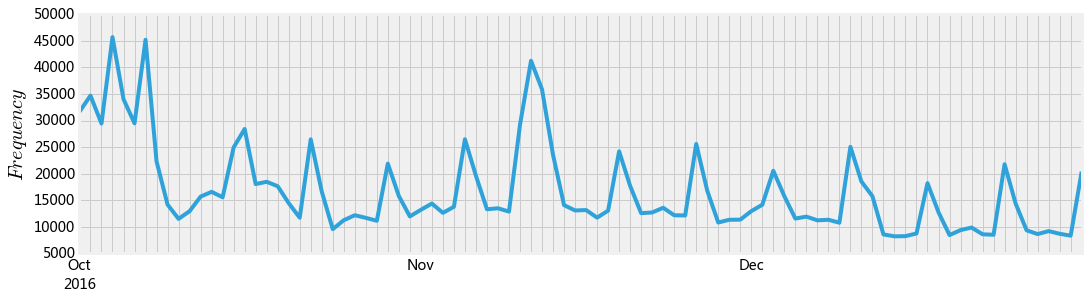

In [144]:
matplotlib.style.use('fivethirtyeight')

fig = plt.figure(figsize=(16, 4),facecolor='white')
ts.plot(xticks = list(ts.index))
plt.axvline(x = datetime.datetime.strptime('20161111', '%Y%m%d'), ymin = 1000, ymax = 9000, color='r')  
plt.xlabel('')
plt.ylabel(u'$Frequency$', fontsize = 20)
plt.show()

周末效应明显

## 图书数据book.txt
各项数据为，图书ID，书名


In [166]:
book_df = pd.read_csv('/Users/chengjun/bigdata/BaiduYueduData/book.txt', encoding = 'gb18030',
                     delimiter='\t', names = ['book', 'book_id'])
len(book_df)

248535

In [167]:
book_df.head()

,book,book_id
0,272f694ae87101f69e3195bd,香蕉林密室
1,26995ca976a20029bd642d96,玉蛇劫
2,fc782a0458fafab069dc02d5,顾群业作品集
3,00195098c1c708a1284a44cb,几回魂梦归大宋
4,8902496daaea998fcd220e28,记得青春曾来过


## 行为数据 （粗粒度）
data2.zip 

- 各文件夹按照日期命名， 每天一个数据
- 各项数据为，用户名，用户行为编号，触发时间（可能有错误），端（1 ipad,2 iphone,3android)

In [89]:
# import gzip
from glob import glob
path = '/Users/chengjun/bigdata/BaiduYueduData/data2/'
data_files = glob(path + "*")
data_files[0], len(data_files)

('/Users/chengjun/bigdata/BaiduYueduData/data2/data-20161001', 81)

In [115]:
for k, i in enumerate(data_files[:3]):
    print k, i[-8:]

0 20161001
1 20161002
2 20161003


In [320]:
read_df = pd.read_csv(data_files[0], encoding = 'gb18030',
                     delimiter='\t', names = ['uid', 'act_id', 'time', 'platform'])
len(read_df)

625764

In [101]:
dat = []
for k, i in enumerate(data_files):
    flushPrint(k)
    read_df = pd.read_csv(i, encoding = 'gb18030',
                     delimiter='\t', names = ['uid', 'act_id', 'time', 'platform'])
    acts = len(read_df)
    user_num = len(set(read_df.uid))
    dat.append([i[-8:], acts, user_num])

80

In [105]:
day, act_num, user_num = np.array(dat).T

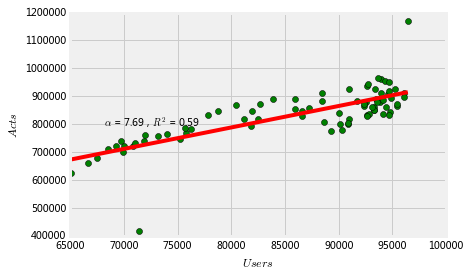

In [113]:
linearRegressPlot(user_num, act_num, 'green', 'o', '$Users$', '$Acts$')

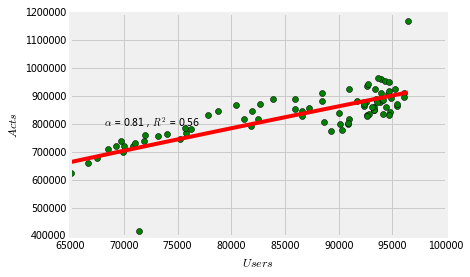

In [108]:
alloRegressPlot(user_num, act_num, 'green', 'o', '$Users$', '$Acts$', loglog = False)

In [321]:
read_df.head()

,uid,act_id,time,platform
0,33575332,1001,20161001005349,3
1,34652591,1001,20161001080046,3
2,34652591,1001,20161001132333,3
3,37500255,1001,19700118094805,2
4,37500255,1001,19700118094805,2


In [322]:
len(read_df), len(set(read_df.uid)), len(set(read_df.act_id)), len(set(read_df.platform))

(625764, 65035, 22, 4)

In [324]:
act_size = read_df.groupby('act_id').size()
act_size

act_id
1001    609822
1027       191
1101       113
1125      1446
1126      1393
1127      2735
1128       118
1130       521
1131       169
1134       237
1135       332
1136       707
1137       893
1138       237
1156         3
1182       134
1192       137
1210       546
1309      3227
1310       370
1337      2175
1397       258
dtype: int64

In [176]:
set(read_df.platform)

{1, 2, 3, 9999}

In [177]:
user_frq = read_df.groupby('uid').size()

user_frq.sort(ascending=False)

In [178]:
user_frq[:10]

uid
2481867318    666
1549060348    414
1820919943    293
2372679733    279
1204785640    265
2617286647    249
1165665872    232
2717912507    226
2356099491    201
2713481868    197
dtype: int64

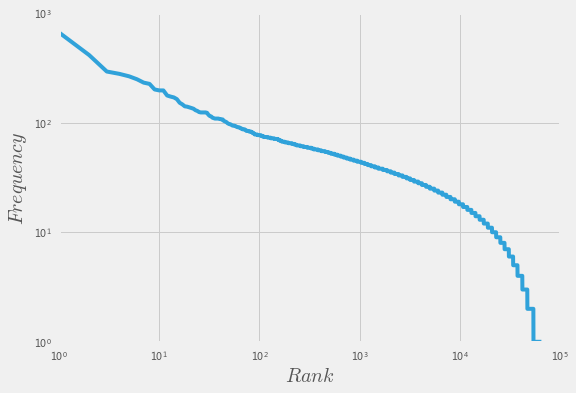

In [179]:
freq_rank = range(1, len(user_frq)+1)
plt.plot(freq_rank, user_frq)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$Rank$', fontsize = 20)
plt.ylabel('$Frequency$', fontsize = 20)
plt.show()

In [191]:
platforms = np.array(read_df.groupby('platform').size())
# 端（1 ipad,2 iphone,3android)
platforms

array([  2204, 149367, 474104,     89])

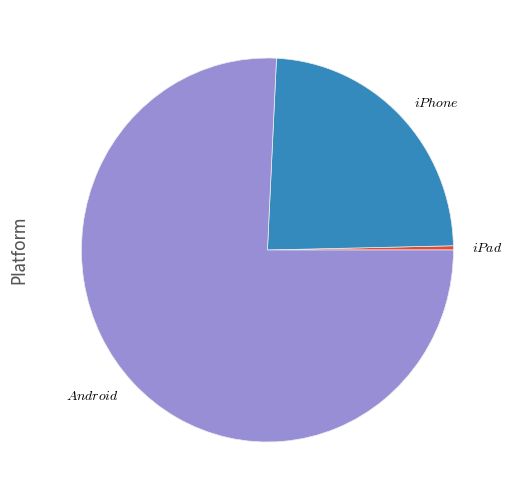

In [202]:
matplotlib.style.use('ggplot')

series = pd.Series(platforms[:3], index=['$iPad$', '$iPhone$', '$Android$'], name='Platform')
series.plot.pie(figsize=(6, 6))

## 阅读数据

- data.zip
- 各文件夹按照日期命名，每天多个数据
- 各项数据为，用户ID，行为编号（只有1098），阅读时长(毫秒)，触发时间，图书ID，端（1 ipad,2 iphone,3androd）

### 研究问题

- 平均阅读时间
- 持续性

In [78]:
# import gzip
from glob import glob
path = '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/'
ads = glob(path + "*zip")
ads[0], len(ads)

('/Users/chengjun/bigdata/BaiduYueduData/wenyuan/data20161001.zip', 81)

In [165]:
# import gzip
from glob import glob
path = '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/'
files = glob(path+'*')
files

['/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/000000_0',
 '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/000001_0',
 '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/000002_0',
 '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/000003_0',
 '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/000004_0',
 '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/000005_0',
 '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/000006_0',
 '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/000007_0',
 '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/000008_0',
 '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/000009_0',
 '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/000010_0',
 '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/000011_0',
 '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/000012_0',
 '/Users/chengjun/bigdata/BaiduYueduData/wenyuan/20161220/000013_0',
 '/Users/chengjun/bigdata/BaiduYue

In [276]:
df = pd.read_csv(files[0], encoding = 'gb18030',
                     delimiter='\x01', names = ['uid', 'act_id', 'time', 'time_trigger', 'book_id', 'platform'])
len(df)

1720426

In [167]:
df1 = pd.read_csv(files[1], encoding = 'gb18030',
                     delimiter='\x01', names = ['uid', 'act_id', 'time', 'time_trigger', 'book_id', 'platform'])
len(df1)

1721315

In [118]:
len(df['uid'].unique())

61260

In [85]:
for i in file:
    df = pd.read_csv(i, encoding = 'gb18030',
                         delimiter='\x01', names = ['uid', 'act_id', 'time', 'time_trigger', 'book_id', 'platform'])
    act_num = len(df)
    user_num = len(df['uid'].unique())
    book_num = len(df['book_id'].unique())
    time_sum = 

1721315

In [100]:
# df[400:410]

In [325]:
df['uid'].unique().tolist()[90:120]

[6657181,
 6736756,
 6806139,
 6844135,
 6944599,
 6989448,
 7064797,
 7141593,
 7169923,
 7495200,
 7509118,
 7513026,
 7613481,
 7666422,
 7704471,
 7707018,
 7713119,
 7757432,
 7765676,
 7766164,
 7813284,
 7895979,
 7941319,
 7969690,
 8028894,
 8281549,
 8321485,
 8363689,
 8496068,
 8533396]

In [98]:
# for i in df['uid'].unique().tolist()[150:200]:
#     print df[df['uid']==i].sort_values(by='time_trigger')

In [278]:
def get_one_attention_df(uid, df):
    a = np.array(df[df['uid']==uid].sort_values(by='time_trigger')[['book_id', 'time']])
    book_sequence = [a[0][0]]
    duration = []
    count = a[0][1]

    for ind in range(1, len(a)):
        if a[ind][0] == a[ind-1][0]:
            count += a[ind][1]
        else:
            book_sequence.append(a[ind][0])
            duration.append(count)
            count = a[ind][1]
            
    duration.append(count)
            
    attention_df = pd.DataFrame([pd.Series([uid] * len(book_sequence)), \
                                 pd.Series(book_sequence), pd.Series(duration)]).T
    attention_df.rename(columns={0:'uid', 1:'book_id', 2:'duration'}, inplace=True)
    return attention_df

In [343]:
get_one_attention_df(12562974, df)

,uid,book_id,duration
0,12562974,7820722743323968011c92e8,27578
1,12562974,6ea82703f111f18583d05a40,58743
2,12562974,4c79b648eefdc8d376ee32df,189817
3,12562974,6ea82703f111f18583d05a40,3463


In [332]:
uid = 12562974
a = df[df['uid']==uid].sort_values(by='time_trigger')[['book_id', 'time']] 
book_sequence = a['book_id'].unique()  # keeping the time sequence
book_time = [a['time'][a['book_id'] == i].sum() for i in book_sequence]

In [333]:
book_sequence, book_time


(array([u'7820722743323968011c92e8', u'6ea82703f111f18583d05a40',
        u'4c79b648eefdc8d376ee32df'], dtype=object),
 [27578.0, 62206.0, 189817.0])

必须合并十几个数据才全面，否则都是不全的。

### 平均阅读时间

毫秒是一种较为微小的时间单位，是一秒的千分之一。

In [38]:
user_time = df[['uid', 'time']].groupby('uid').sum()
user_time = user_time.dropna()
user_time = user_time.sort_values(by = 'time',ascending=False)

In [48]:
np.max(user_time['time'])/(1000*60), np.min(user_time['time']), np.mean(user_time['time'])/(1000*60), \
np.median(user_time['time'])/(1000*60)

(2207.7407166666667, 0.0, 11.173792069464623, 4.2114833333333337)

In [45]:
np.mean(user_time['time'])/(1000*60) # 11.2分钟

11.173792069464623

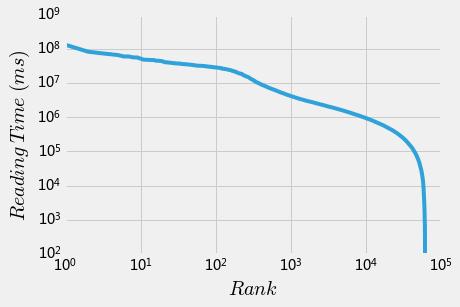

In [43]:
matplotlib.style.use('fivethirtyeight')

freq_rank = range(1, len(user_time['time'])+1)
plt.plot(freq_rank, user_time['time'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$Rank$', fontsize = 20)
plt.ylabel('$Reading\;Time\;(ms)$', fontsize = 20)
plt.show()

### 个体是否可以集中注意力读书？

In [156]:
a = df[df['uid']==321636].sort_values(by='time_trigger')
book_sequence = a['book_id'].unique()  # keeping the time sequence
book_time = [a['time'][a['book_id'] == i].sum() for i in book_sequence]
book_sequence, book_time

(array([u'dcffc4a4998fcc22bdd10d2e', u'e6deb0ced4d8d15abf234e2f',
        u'2a31ea6b4b35eefdc9d3332b', u'1c19e7a5172ded630a1cb628',
        u'd7eb5e27a45177232e60a20a'], dtype=object),
 [42596.0, 10798.0, 25118.0, 34415.0, 32564.0])

In [331]:
a.groupby(['book_id']).sum()

,uid,act_id,time,time_trigger,platform
book_id,,,,,
1c19e7a5172ded630a1cb628,1608180,5490,34415.0,100806100166930,15
2a31ea6b4b35eefdc9d3332b,643272,2196,25118.0,40322440064146,6
d7eb5e27a45177232e60a20a,964908,3294,32564.0,60483660105456,9
dcffc4a4998fcc22bdd10d2e,1608180,5490,42596.0,100806100123525,15
e6deb0ced4d8d15abf234e2f,321636,1098,10798.0,20161220030657,3


In [147]:
a[['book_id', 'time']].groupby('book_id').sum()

,time
book_id,
1c19e7a5172ded630a1cb628,34415.0
2a31ea6b4b35eefdc9d3332b,25118.0
d7eb5e27a45177232e60a20a,32564.0
dcffc4a4998fcc22bdd10d2e,42596.0
e6deb0ced4d8d15abf234e2f,10798.0


In [186]:
# from glob import glob
# import pandas as pd
# import numpy as np
# import time

# def main()
#     # get merged data_files
#     path = './baidu_yuedu/reading_merge/'
#     data_files = glob(path + "*")

#     # read book data
#     book_df = pd.read_csv('./baidu_yuedu/book.txt', delimiter='\t', names = ['book', 'book_id'])

#     # define a file used to record:
#     # day,time_sum,unique_user_num,unique_book_num
#     writefile=open('count.txt', 'w')
#     writefile.write('day,time_sum,unique_user_num,unique_book_num\n')
#     for k, path in enumerate(data_files):
#         # extract filename
#         filename = path[-12:-4]
#         print k, filename, time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time()))

#         oneday_df = pd.read_csv(path, encoding='gb18030',
#                             delimiter='\x01', names = ['uid', 'act_id', 'time', 'time_trigger', 'book_id', 'platform'])
#         oneday_df = oneday_df.dropna()
        
#         # drop strings in oneday_df['time']
#         oneday_df = oneday_df[oneday_df['time'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]
#         # oneday_df['time'] = [int(i) for i in oneday_df['time']]
        
#         time_sum = oneday_df['time'].sum()
#         unique_user_num = len(set(oneday_df['uid']))
#         unique_book_num = len(set(oneday_df['book_id']))
        
#         # top100_uid = oneday_df.groupby('book_id')['uid'].nunique().sort_values(ascending=False)[:100]
#         # top100_uid_df = pd.DataFrame([top100_uid.index, list(top100_uid)]).T
#         # top100_uid_df.rename(index=str, columns={1:'count'}, inplace=True)
#         # book_df.merge(top100_uid_df, left_on='book', right_on=0)[['book_id', 'count']].sort_values(by='count', ascending=False).to_csv(filename+'_uid_book.csv', index=False)
        
#         # top100_time = oneday_df.groupby('book_id')['time'].sum().sort_values(ascending=False)[:100]
#         # top100_time_df = pd.DataFrame([top100_time.index, list(top100_time)]).T
#         # top100_time_df.rename(index=str, columns={1:'count'}, inplace=True)
#         # book_df.merge(top100_time_df, left_on='book', right_on=0)[['book_id', 'count']].sort_values(by='count', ascending=False).to_csv(filename+'_time_book.csv', index=False)
        
#         writefile.write(filename+','+str(time_sum)+','+str(unique_user_num)+','+str(unique_book_num)+'\n')
#     writefile.close()

# if __name__ == "__main__":
#     main()

## 汇总分析

In [244]:
df = pd.read_csv('/Users/chengjun/github/cjc/data/baidu_reading_app.txt',
                     delimiter=',', header = 0)
len(df)

81

In [245]:
df['time_sum'] = df['time_sum']*10**-3/3600
df['day'] = [datetime.datetime.strptime(str(i), '%Y%m%d') for i in df.day.tolist()]
df = df.sort_values(by = 'day')

In [266]:
df[:3]

,day,time_sum,unique_user_num,unique_book_num
51,2016-10-01,172308.079401,54218,22339
55,2016-10-02,168994.798149,55742,23065
15,2016-10-03,178656.799339,56321,23063


In [274]:
df[-3:]

,day,time_sum,unique_user_num,unique_book_num
25,2016-12-18,191867.521631,69990,30097
49,2016-12-19,177361.298479,68202,28982
67,2016-12-20,185177.103094,68869,29628


In [241]:
zip(df.day, df.time_sum)[:3]

[(Timestamp('2016-10-01 00:00:00'), 620309.08584499999),
 (Timestamp('2016-10-02 00:00:00'), 608381.27333799994),
 (Timestamp('2016-10-03 00:00:00'), 643164.47761900001)]

In [272]:
df.sort_values(by = 'time_sum', ascending = False)[:5] 
# 需要问问百度阅读的人，为什么2016-11-04,2016-10-21的阅读时长这么高？

,day,time_sum,unique_user_num,unique_book_num
77,2016-11-04,1.581917e+06,76165,27596
33,2016-10-21,1.178018e+06,68692,25303
39,2016-10-22,2.665707e+05,70713,26675
42,2016-11-23,2.568500e+05,76121,29922
48,2016-12-15,2.551900e+05,76564,33936


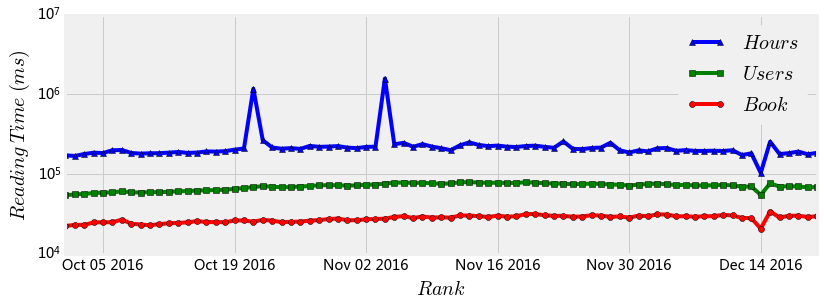

In [250]:
matplotlib.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4),facecolor='white')
plt.plot(df.day, df.time_sum, 'b-^', label = '$Hours$')
plt.plot(df.day, df.unique_user_num, 'g-s', label = '$Users$')
plt.plot(df.day, df.unique_book_num, 'r-o', label = '$Book$')
plt.yscale('log')
plt.xlabel('$Rank$', fontsize = 20)
plt.ylabel('$Reading\;Time\;(ms)$', fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

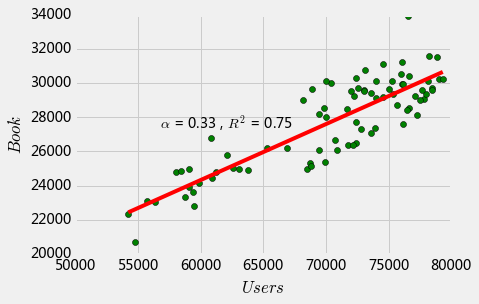

In [271]:
linearRegressPlot(df.unique_user_num, df.unique_book_num, 'green', 'o', '$Users$', '$Book$')

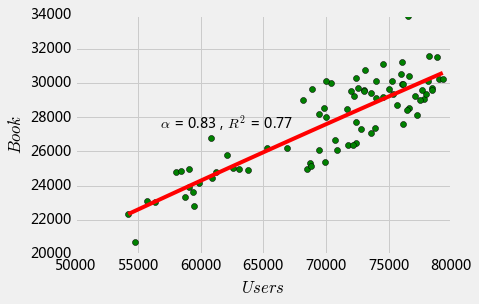

In [254]:
alloRegressPlot(df.unique_user_num, df.unique_book_num, 'green', 'o', '$Users$', '$Book$', loglog = False)

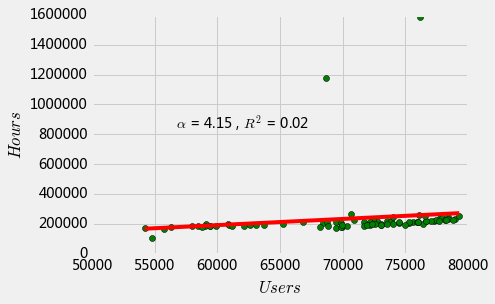

In [257]:
linearRegressPlot(df.unique_user_num, df.time_sum, 'green', 'o', '$Users$', '$Hours$')#, loglog = True)

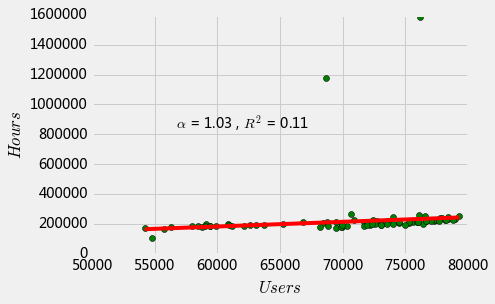

In [263]:
alloRegressPlot(df.unique_user_num, df.time_sum, 'green', 'o', '$Users$', '$Hours$', loglog = False)

In [264]:
df2 = df[df['time_sum'] < 400000] # 剔除两个异常值

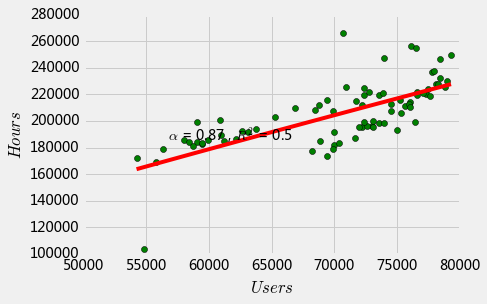

In [265]:
alloRegressPlot(df2.unique_user_num, df2.time_sum, 'green', 'o', '$Users$', '$Hours$', loglog = False)

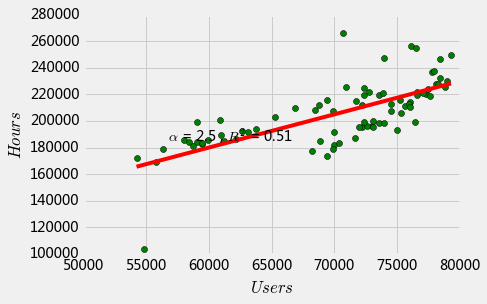

In [270]:
linearRegressPlot(df2.unique_user_num, df2.time_sum, 'green', 'o', '$Users$', '$Hours$')

线性拟合的时间和幂律拟合效果差不多，并没有规模经济特点,随着人数增加，读书数量和总时间线性增加。每天活跃人数不足十万，百度阅读app任重道远。

In [275]:
0.26*0.05

0.013000000000000001

# 80000本书分析

In [136]:
book_df = pd.read_excel('/Users/chengjun/bigdata/BaiduYueduData/bookinfo.xlsx')

In [137]:
len(book_df)

87209

In [138]:
book_df.rename(columns={u'图书名称': 'book', u'图书连接': 'book_id', \
                    u'上下架状态（2-上，1-下）': 'status', u'一级分类':'cat', u'文库价（元）':'price'}, inplace=True)

In [139]:
book_df = book_df.sort_values('price', ascending = False)

In [140]:
book_df[:10]

,book,book_id,status,cat,price
36492,数据库营销模式,d9f963418bd63186bcebbcc4,2,计算机,2999.90
47058,新概念高效学习法——励志大师是怎样炼成的,01ed182c680203d8ce2f24aa,2,成功励志,1980.00
49609,《幽灵的礼物：价值百万的理念炒股法教程》,a53c68f43968011ca30091d6,2,经济管理,1888.00
50267,怀水清兴：康宁花鸟画精品集,03918f1150e2524de4187e5f,2,文学艺术,1539.82
70168,女兵退伍回忆录【一】,73cf66263186bceb19e8bbfe,2,生活,1000.00
44314,《实用操盘学》系列教程（2）三日战法图谱,3fe2434750e2524de4187e9c,2,经济管理,999.00
84639,由他说营销,39612420591b6bd97f192279168884868762b8e4,2,经济管理,720.00
52407,《橋頭契約》(影印稿） 之咸丰、同治、光绪、宣统篇,98786938e009581b6ad9eb14,2,历史传记,680.00
67866,抄底逃顶,0e2f57f9760bf78a6529647d27284b73f242365c,2,经济管理,600.00
64929,玄天战尊,ddcd0148dd3383c4ba4cd293,2,原创男频,541.14


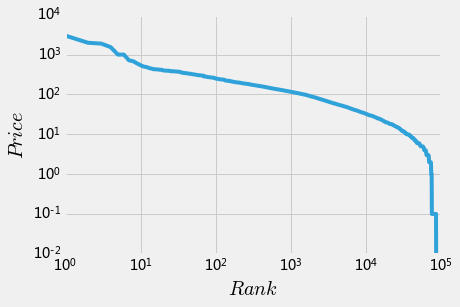

In [141]:
price_rank = range(1, len(book_df)+1)
price = book_df.price

matplotlib.style.use('fivethirtyeight')

plt.plot(price_rank, price)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$Rank$', fontsize = 20)
plt.ylabel('$Price$', fontsize = 20)
plt.show()

In [142]:
cat_df = book_df[['cat', 'price']].groupby('cat').mean()
cat_df1 = book_df[['cat', 'price']].groupby('cat').sum()

In [143]:
cat_df.sort_values('price', ascending = False)

,price
cat,
原创男频,37.919108
原创女频,24.820372
计算机,22.712265
经济管理,13.692110
科技,11.911575
社会科学,11.274738
历史传记,10.115750
生活,8.506498
外文,7.803704


In [156]:
cat_df1.sort_values('price', ascending = False)

,price
cat,
原创女频,477097.20
原创男频,402890.52
经济管理,86972.28
小说,77341.88
社会科学,65370.93
文学艺术,52620.73
计算机,46719.13
成功励志,38858.71
生活,31865.34


In [144]:
cat_list = []
for i in cat_df.index:
    cat_list.append([i, np.float(cat_df.price[i]), np.float(cat_df1.price[i])])


cat, mean_price, sum_price  = np.array(cat_list).T

mean_price = [np.float(i) for i in mean_price]
sum_price = [np.float(i) for i in sum_price]

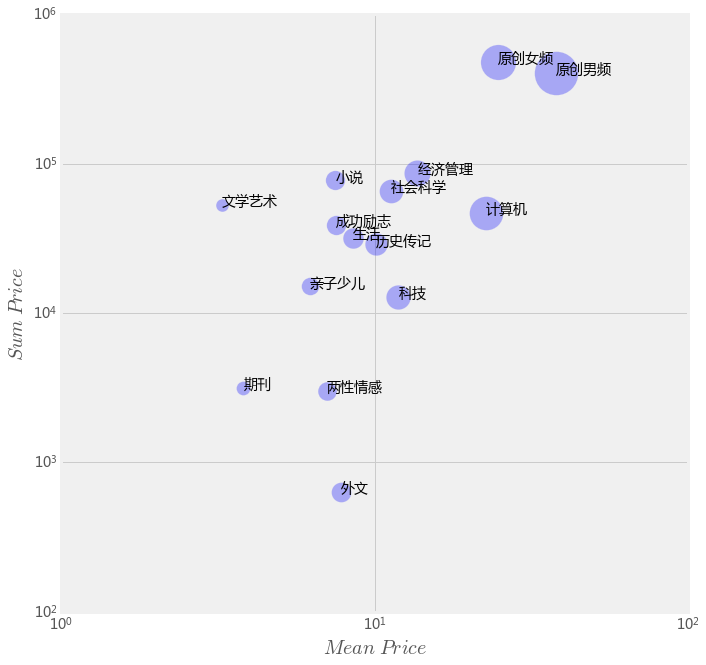

In [166]:
matplotlib.style.use('fivethirtyeight')

fig = plt.figure(figsize=(10, 10),facecolor='white')
for k, i in enumerate(cat):
    plt.text(mean_price[k], sum_price[k], i)
    plt.scatter(mean_price[k], sum_price[k], s = mean_price[k]*50, alpha = 0.3)
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**2, 10**6)
plt.xlabel('$Mean\; Price$',fontsize = 20)
plt.ylabel("$Sum\; Price$", fontsize = 20)
plt.show()

可见sum和mean两种汇总的结果的不一致的地方，可以展开说说，比如小说的均价较低，但读者众多，总价很高。反映了书本身的通俗性和不同类别之间学习成本的问题。

In [175]:
def alloRegressPlotCat(xdata,ydata,col,mark,xlab,ylab, loglog):
    x=np.log(xdata+1);y=np.log(ydata+1);
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant=res.params[0];beta=res.params[1]; r2=res.rsquared
    #plt.plot(xdata,ydata,mark,color=col)
    if loglog == True:
        plt.xscale('log');plt.yscale('log')
    plt.xlabel(xlab);plt.ylabel(ylab)
    minx,maxx=plt.xlim(); miny,maxy=plt.ylim()
    plt.text(min(xdata)+(max(xdata)-min(xdata))/10,
         min(ydata)+(max(ydata)-min(ydata))/2,
         '$\\alpha$ = '+ str(np.round(beta,2)) + ' , ' \
         + '$R^2$ = ' + str(np.round(r2,2)) )
    xs = np.linspace(min(xdata),max(xdata),100)
    plt.plot(xs,np.exp(constant)*xs**beta,color='r',linestyle='-', alpha = 0.3)
    for k, i in enumerate(cat):
        plt.text(mean_price[k], sum_price[k], i)
        plt.scatter(mean_price[k], sum_price[k], s = mean_price[k]*50, alpha = 0.3)

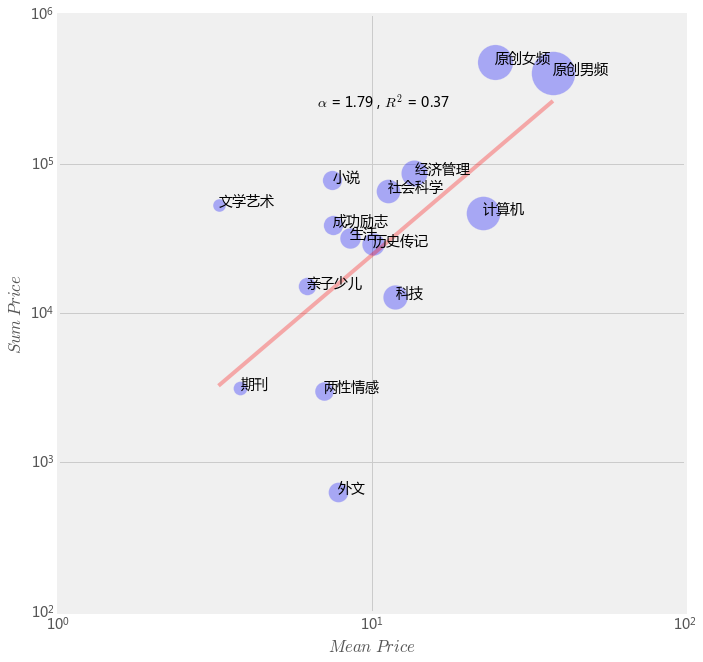

In [176]:
fig = plt.figure(figsize=(10, 10),facecolor='white')

matplotlib.style.use('fivethirtyeight')
alloRegressPlotCat(np.array(mean_price), np.array(sum_price),\
                'g','s','$Mean\; Price$','$Sum\; Price$', True)

### 汇总80000本书籍的流行度
- 定价、阅读人数、阅读时间、兑换数量、销售数量

In [26]:
merge_df = pd.read_csv('/Users/chengjun/bigdata/BaiduYueduData/book_87205_gbk.csv')

In [27]:
merge_df.fillna(0, inplace=True)  # modifies df inplace 

In [28]:
merge_df['book_name'] = merge_df['book_name'].str.decode('gbk')
merge_df['category'] = merge_df['category'].str.decode('gbk')

In [29]:
merge_df[:6]

,book_name,book_id,status,category,price,sell_count,vouch_count,user_count,time_count
0,美丽才是大事业,f0292d09de80d4d8d15a4f81,2,成功励志,2.9,0.0,59.0,51.0,30491531.0
1,杜拉拉职场速腾36计,efa15151be23482fb4da4c81,2,成功励志,3.8,0.0,1.0,2.0,192540.0
2,跟第一夫人学品位,12af3145852458fb770b5683,2,成功励志,3.8,0.0,0.0,0.0,0.0
3,聪明糊涂心：智者的双赢处世哲学,55a24e240066f5335a812180,2,成功励志,3.8,2.0,1.0,5.0,5553830.0
4,谁是公司最需要的人,c44ce7e7102de2bd96058880,2,成功励志,3.8,0.0,0.0,0.0,0.0
5,1分钟如何赢得好印象,9476d2e1551810a6f5248681,2,成功励志,3.8,0.0,0.0,2.0,271093.0


In [30]:
merge_cat_df = merge_df.groupby('category').sum()
merge_cat_df

,status,price,sell_count,vouch_count,user_count,time_count
category,,,,,,
两性情感,862,3025.73,849.0,9084.0,11040.0,1.601330e+10
亲子少儿,4878,15112.71,933.0,12857.0,20242.0,2.289269e+10
历史传记,5718,28920.93,4114.0,33138.0,58984.0,1.801204e+11
原创女频,38444,477097.20,110807.0,324938.0,1230446.0,1.288743e+13
原创男频,21250,402890.52,47287.0,105093.0,301942.0,5.555884e+12
外文,162,632.10,52.0,386.0,1051.0,6.994552e+08
小说,20644,77341.88,64459.0,689763.0,901802.0,4.765735e+12
成功励志,10298,38858.71,8780.0,66118.0,106630.0,1.201648e+11
文学艺术,32440,52620.73,8112.0,77106.0,176553.0,2.273192e+11


In [31]:
merge_cat_df = merge_df.groupby('category').sum()
merge_cat_df['time_count'] = merge_cat_df['time_count']/3600/24
merge_cat_df = merge_cat_df.sort_values('time_count', ascending = False)

In [32]:
merge_cat_df[["price", "sell_count", "vouch_count", "user_count", "time_count"]]

,price,sell_count,vouch_count,user_count,time_count
category,,,,,
原创女频,477097.20,110807.0,324938.0,1230446.0,1.491601e+08
原创男频,402890.52,47287.0,105093.0,301942.0,6.430421e+07
小说,77341.88,64459.0,689763.0,901802.0,5.515897e+07
文学艺术,52620.73,8112.0,77106.0,176553.0,2.631009e+06
历史传记,28920.93,4114.0,33138.0,58984.0,2.084727e+06
成功励志,38858.71,8780.0,66118.0,106630.0,1.390796e+06
经济管理,86972.28,8344.0,44530.0,71329.0,1.106260e+06
社会科学,65370.93,6792.0,58212.0,95255.0,1.048901e+06
生活,31865.34,3692.0,38846.0,69927.0,6.268548e+05


In [33]:
category = merge_cat_df.index
category

Index([u'原创女频', u'原创男频', u'小说', u'文学艺术', u'历史传记', u'成功励志', u'经济管理', u'社会科学',
       u'生活', u'亲子少儿', u'期刊', u'两性情感', u'科技', u'计算机', u'外文'],
      dtype='object', name=u'category')

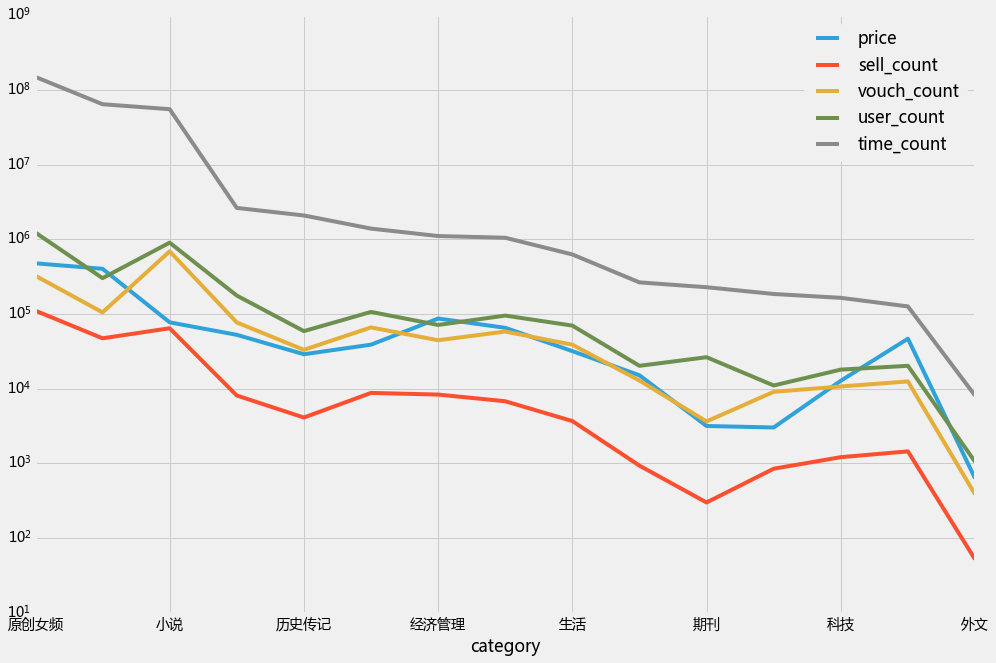

In [34]:
matplotlib.style.use('fivethirtyeight')

merge_cat_df[["price", "sell_count", "vouch_count", "user_count", "time_count"]].\
plot(logy = True, figsize = (15,10))

In [51]:
def alloRegressPlot(xdata,ydata,col,mark,xlab,ylab, loglog):
    x=np.log(xdata+1);y=np.log(ydata+1);
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant=res.params[0];beta=res.params[1]; r2=res.rsquared
    plt.plot(xdata,ydata,mark,color=col, 
            label = '$\\alpha$ = '+ str(np.round(beta,2)) + ' , ' \
         + '$R^2$ = ' + str(np.round(r2,2)))
    if loglog == True:
        plt.xscale('log');plt.yscale('log')
    plt.xlabel(xlab);plt.ylabel(ylab)
    minx,maxx=plt.xlim(); miny,maxy=plt.ylim()
    xs = np.linspace(min(xdata),max(xdata),100)
    plt.plot(xs,np.exp(constant)*xs**beta,color='r',linestyle='-')
    plt.legend(loc = 4)

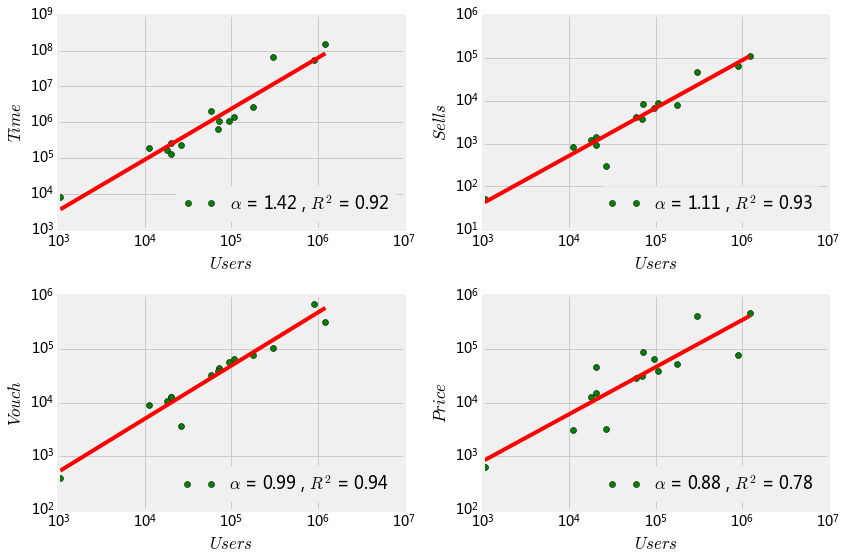

In [52]:
fig = plt.figure(figsize=(12, 8),facecolor='white')
ax = fig.add_subplot(2,2,1)
alloRegressPlot(merge_cat_df.user_count, merge_cat_df.time_count, 'green', 'o', '$Users$', '$Time$', loglog = True)

ax = fig.add_subplot(2,2,2)
alloRegressPlot(merge_cat_df.user_count, merge_cat_df.sell_count, 'green', 'o', '$Users$', '$Sells$', loglog = True)

ax = fig.add_subplot(2,2,3)
alloRegressPlot(merge_cat_df.user_count, merge_cat_df.vouch_count, 'green', 'o', '$Users$', '$Vouch$', loglog = True)

ax = fig.add_subplot(2,2,4)
alloRegressPlot(merge_cat_df.user_count, merge_cat_df.price, 'green', 'o', '$Users$', '$Price$', loglog = True)
plt.tight_layout()


我们可以将书籍的定价、阅读人数、阅读时间、兑换数量、销售数量看图书流行程度的测量（或者说读者的接受程度），分析结果表明在图书类别层面而言，书籍的流行度的五种不同测量之间高度一致。女频、男频、小说、文学艺术这些娱乐性的是第一梯队；历史传记、成功励志、经济管理、社会科学是第二梯队；生活、亲子、两性是第三梯队；科技、期刊、计算机、外文是第四梯队。以上汇总到图书类别的计算均使用了sum累加的方法，nan被替换成了0。

In [165]:
merge_cat_df.user_count[u'原创女频']

1230446.0

In [166]:
def alloRegressPlotCat(xdata,ydata,col,mark,xlab,ylab, loglog):
    x=np.log(xdata+1);y=np.log(ydata+1);
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant=res.params[0];beta=res.params[1]; r2=res.rsquared
    
    plt.text(min(xdata)+(max(xdata)-min(xdata))/10,
         min(ydata)+(max(ydata)-min(ydata))/2,
         '$\\alpha$ = '+ str(np.round(beta,2)) + ' , ' \
         + '$R^2$ = ' + str(np.round(r2,2)) )
    xs = np.linspace(min(xdata),max(xdata),100)
    plt.plot(xs,np.exp(constant)*xs**beta,color='r',linestyle='-', alpha = 0.3)
    for k, i in enumerate(category):
        plt.text(xdata[k], ydata[k], i)
        plt.scatter(xdata[k], ydata[k], s = xdata[k]*10**-2, alpha = 0.3)
        
    #plt.plot(xdata,ydata,mark,color=col)
    if loglog == True:
        plt.xscale('log');plt.yscale('log')
    plt.xlabel(xlab);plt.ylabel(ylab)
    minx,maxx=plt.xlim(); miny,maxy=plt.ylim()
        
        

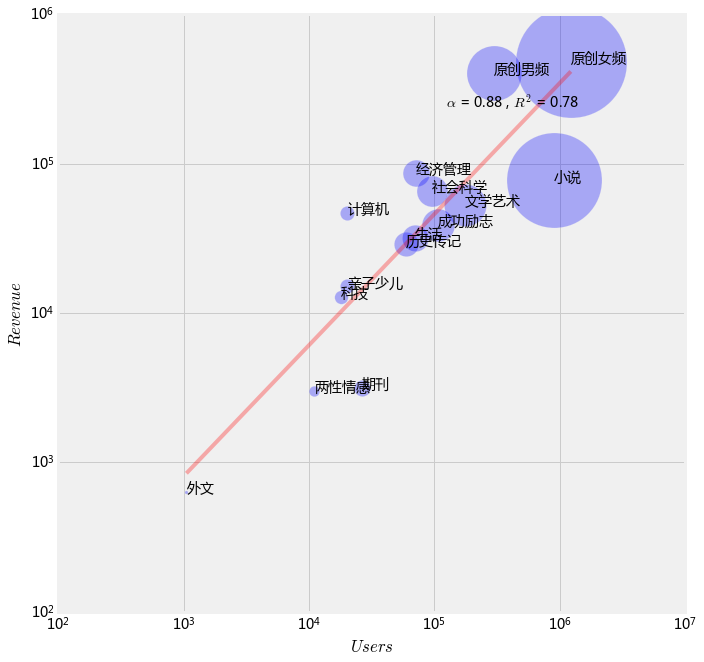

In [167]:
fig = plt.figure(figsize=(10, 10),facecolor='white')

matplotlib.style.use('fivethirtyeight')
alloRegressPlotCat(merge_cat_df.user_count, merge_cat_df.price,\
                'g','s','$Users$','$Revenue$', True)

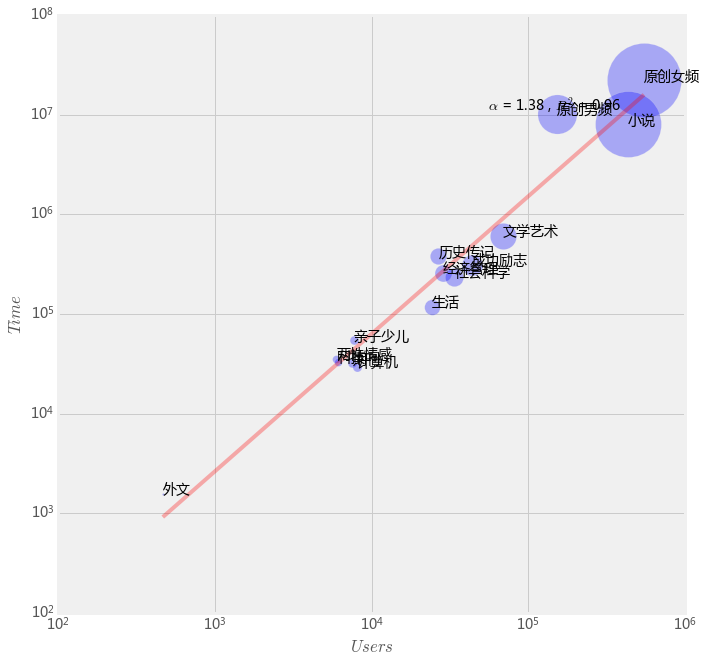

In [202]:
fig = plt.figure(figsize=(10, 10),facecolor='white')

matplotlib.style.use('fivethirtyeight')
alloRegressPlotCat(merge_cat_df.user_count, merge_cat_df.time_count,\
                'g','s','$Users$','$Time$', True)

## 累积阅读时长错误

In [44]:
ef = pd.read_csv('/Users/chengjun/bigdata/BaiduYueduData/988179809.csv')
ef["time_trigger"]=[datetime.datetime.strptime(str(int(i)), '%Y%m%d%H%M%S') for i in ef.time_trigger.tolist()]
ef = ef.sort_values(["time_trigger"])

In [11]:
ef.time_trigger[2]

20161220082700.0

In [23]:
ef[:10]

,uid,act_id,time,time_trigger,book_id,platform
53,988179809,1098,46.852378,2016-12-20 08:24:00,50269913f61fb7360a4c65cd,3
6,988179809,1098,0.008374,2016-12-20 08:25:00,50269913f61fb7360a4c65cd,3
71,988179809,1098,0.006071,2016-12-20 08:25:00,50269913f61fb7360a4c65cd,3
16,988179809,1098,0.004660,2016-12-20 08:25:00,50269913f61fb7360a4c65cd,3
42,988179809,1098,0.005472,2016-12-20 08:26:00,50269913f61fb7360a4c65cd,3
67,988179809,1098,0.004580,2016-12-20 08:26:00,50269913f61fb7360a4c65cd,3
59,988179809,1098,0.001996,2016-12-20 08:26:00,50269913f61fb7360a4c65cd,3
7,988179809,1098,0.000162,2016-12-20 08:26:00,50269913f61fb7360a4c65cd,3
21,988179809,1098,0.002906,2016-12-20 08:26:00,50269913f61fb7360a4c65cd,3
12,988179809,1098,0.000376,2016-12-20 08:26:00,50269913f61fb7360a4c65cd,3


In [45]:
ef[['time','time_trigger']].groupby('time_trigger').sum()

,time
time_trigger,
2016-12-20 08:24:00,46.852378
2016-12-20 08:25:00,0.019105
2016-12-20 08:26:00,0.015492
2016-12-20 08:27:00,0.019252
2016-12-20 08:28:00,0.013919
2016-12-20 08:29:00,0.018083
2016-12-20 08:30:00,0.017326
2016-12-20 08:31:00,0.014234
2016-12-20 08:32:00,0.017010


In [28]:
datetime.datetime.strptime('2016-12-20 12:08:00', '%Y-%m-%d %H:%M:%S') - \
datetime.datetime.strptime('2016-12-20 08:32:00', '%Y-%m-%d %H:%M:%S')

datetime.timedelta(0, 12960)

In [37]:
12960.0/3600

3.6

In [35]:
datetime.datetime.strptime('2016-12-20 17:09:00', '%Y-%m-%d %H:%M:%S') - \
datetime.datetime.strptime('2016-12-20 12:17:00', '%Y-%m-%d %H:%M:%S')

datetime.timedelta(0, 17520)

In [36]:
17520.0/3600

4.866666666666666

In [57]:
rf = ef[ef['time'] <= 5.0/60]
rf[['time','time_trigger']].groupby('time_trigger').sum()

,time
time_trigger,
2016-12-20 08:25:00,0.019105
2016-12-20 08:26:00,0.015492
2016-12-20 08:27:00,0.019252
2016-12-20 08:28:00,0.013919
2016-12-20 08:29:00,0.018083
2016-12-20 08:30:00,0.017326
2016-12-20 08:31:00,0.014234
2016-12-20 08:32:00,0.017010
2016-12-20 12:08:00,0.004908


In [58]:
0.16*60

9.6

In [59]:
1.0/60

0.016666666666666666

In [60]:
len(ef), len(rf)

(73, 70)

# Attention flow

In [76]:
af_df = pd.read_csv('/Users/chengjun/bigdata/BaiduYueduData/all_attenion.txt')

In [ ]:
# af_df = af_df.dropna()

In [77]:
# delete duplicates headers
af_df = af_df[af_df.uid.str.contains("uid") == False]

In [78]:
# convert str to float
af_df['duration'] = [int(np.float(i)/1000/60)+1 for i in af_df.duration]

In [79]:
af_df['day'] = af_df.startingtime.str[:10]

In [195]:
af_df[:5]

,uid,book_id,duration,startingtime,day
0,116294,bf6f5580f90f76c660371a28,97,2016-10-01 00:24:01,2016-10-01
1,116294,c4721243650e52ea55189895,1,2016-10-01 21:30:44,2016-10-01
2,116294,bf6f5580f90f76c660371a28,25,2016-10-01 21:31:20,2016-10-01
3,200851,003798047fd5360cbb1adb0e,47,2016-10-01 00:35:41,2016-10-01
4,718703,751d350f7481509368a6d9a50d344866,56,2016-10-01 01:19:18,2016-10-01


In [220]:
days = af_df.day.unique()
days[:3]

array(['2016-10-01', '2016-10-02', '2016-10-03'], dtype=object)

In [67]:
len(af_df)

9562420

In [35]:
af_df.groupby('day')['uid'].nunique()[:5]

day
2016-10-01    41140
2016-10-02    42014
2016-10-03    42543
2016-10-04    43763
2016-10-05    44213
Name: uid, dtype: int64

In [196]:
dbg = af_df.groupby(['day', 'book_id'])
dbg['uid'].nunique()[:5]

day         book_id                 
2016-10-01  0003518d03d8ce2f0166231c    1
            0003bbd56bec0975f465e284    3
            0004cb34a6c30c2259019e49    1
            0005d2cbd4d8d15abe234e57    1
            0006a5535727a5e9856a61b3    6
Name: uid, dtype: int64

In [219]:
pv[:10].loc['2016-10-01']

book_id
0003518d03d8ce2f0166231c             24.054217
0003bbd56bec0975f465e284              2.794950
0004cb34a6c30c2259019e49              0.079050
0005d2cbd4d8d15abe234e57              3.978383
0006a5535727a5e9856a61b3             20.700367
00072ee7cc175527062208df            111.258467
0007ffd981c758f5f71f6703              0.776900
00185b39ab3a8b8e9a6bb418317058da     17.427750
001adb03e53a580216fcfe8f              0.571183
002266006bd97f192279e942              0.353483
Name: duration, dtype: float64

In [207]:
dbg['uid'].nunique()[:5]

day         book_id                 
2016-10-01  0003518d03d8ce2f0166231c    1
            0003bbd56bec0975f465e284    3
            0004cb34a6c30c2259019e49    1
            0005d2cbd4d8d15abe234e57    1
            0006a5535727a5e9856a61b3    6
Name: uid, dtype: int64

In [200]:
dbg.sum()['duration1s'][:5]

day         book_id                 
2016-10-01  0003518d03d8ce2f0166231c    25
            0003bbd56bec0975f465e284     4
            0004cb34a6c30c2259019e49     1
            0005d2cbd4d8d15abe234e57     4
            0006a5535727a5e9856a61b3    24
Name: duration1s, dtype: int64

## Allometric growth

In [197]:
pv = dbg.sum()['duration']   
uv = dbg['uid'].nunique()

In [217]:
pv.index.values

array([('2016-10-01', '0003518d03d8ce2f0166231c'),
       ('2016-10-01', '0003bbd56bec0975f465e284'),
       ('2016-10-01', '0004cb34a6c30c2259019e49'), ...,
       ('2016-12-20', 'fff4486a5bcfa1c7aa00b52acfc789eb172d9e81'),
       ('2016-12-20', 'fff7378a76a20029bd642dcb'),
       ('2016-12-20', 'fffcdd7a2a359a552a120f5adb50dbce')], dtype=object)

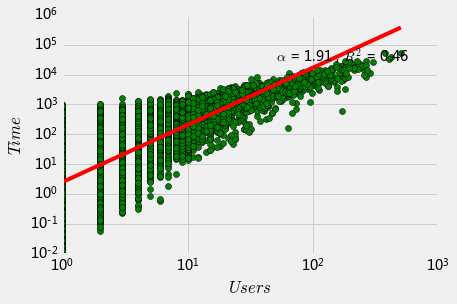

In [221]:
alloRegressPlot(uv.loc['2016-10-11'], pv.loc['2016-10-11'], 'green', 'o', '$Users$', '$Time$', loglog = True)

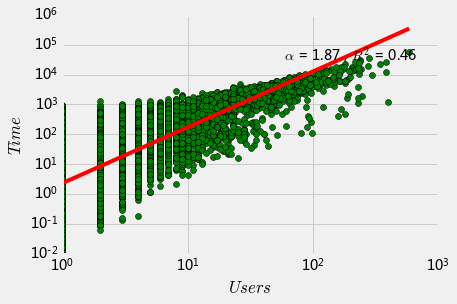

In [220]:
alloRegressPlot(uv.loc['2016-10-01'], pv.loc['2016-10-01'], 'green', 'o', '$Users$', '$Time$', loglog = True)

In [30]:
af_df.groupby('day').sum()[:5]

,duration
day,
2016-10-01,4.090096e+06
2016-10-02,4.503444e+06
2016-10-03,4.761403e+06
2016-10-04,4.998201e+06
2016-10-05,5.174289e+06


In [22]:
pv = af_df.groupby('day').sum()['duration']   
uv = af_df.groupby('day')['uid'].nunique()

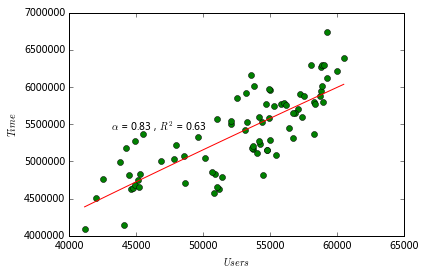

In [36]:
alloRegressPlot(uv, pv, 'green', 'o', '$Users$', '$Time$', loglog = False)

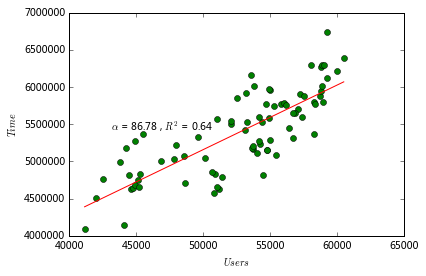

In [29]:
linearRegressPlot(uv, pv, 'green', 'o', '$Users$', '$Time$')

### 个人持续读一本书的时间分布

In [87]:
af_df[:3]

,uid,book_id,duration,startingtime,day
0,116294,bf6f5580f90f76c660371a28,97,2016-10-01 00:24:01,2016-10-01
1,116294,c4721243650e52ea55189895,1,2016-10-01 21:30:44,2016-10-01
2,116294,bf6f5580f90f76c660371a28,25,2016-10-01 21:31:20,2016-10-01


In [69]:
duration_dic = defaultdict(int)
for i in af_df.duration10s:
    duration_dic[i] += 1

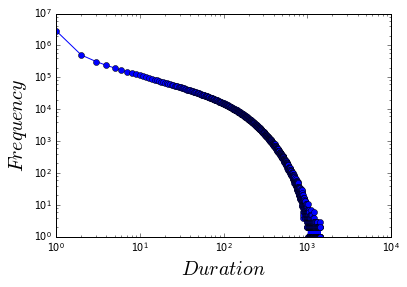

In [119]:
plt.plot(duration_dic.keys(), duration_dic.values(), '-o')
plt.xlabel('$Duration$', fontsize = 20)
plt.ylabel('$Frequency$', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.show()

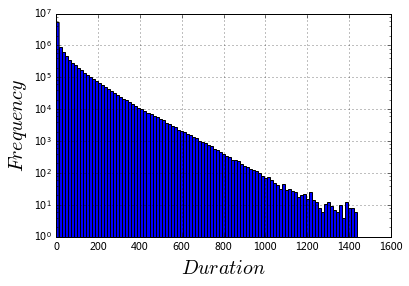

In [71]:
af_df['duration'].hist(bins = 100)
plt.xlabel('$Duration$', fontsize = 20)
plt.ylabel('$Frequency$', fontsize = 20)
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [74]:
def powerPlot(data):
    d = sorted(data, reverse = True )
    d_table = defaultdict(int)
    for k in d:
        d_table[k] += 1
    d_value = sorted(d_table)
    d_freq = [d_table[i] for i in d_value]
    d_prob = [float(i)/sum(d_freq) for i in d_freq]
    #d_rank = ss.rankdata(d_value).astype(int)
    x = np.log(d_value)
    y = np.log(d_prob)
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant,beta = res.params
    r2 = res.rsquared
    plt.plot(d_value, d_prob, 'ro')
    plt.plot(d_value, np.exp(constant+x*beta),"red")
    plt.xscale('log'); plt.yscale('log')
    plt.text(max(d_value)/5,max(d_prob)/5,
             'Beta = ' + str(round(beta,2)) +'\n' + 'R squared = ' + str(round(r2, 2)))
    plt.title('Size Distribution')
    plt.ylabel('Probability')
    plt.xlabel('Size')
    plt.show()    
    
def powerRankPlot(data):
    t = np.array(sorted(data,key=lambda x:-x))
    r = np.array(range(len(data))) +1
    x = np.log(r)
    y = np.log(t)
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant, beta = res.params
    r2 = res.rsquared
    plt.plot(r,t, "o",color='b',markersize=5)
    plt.plot(r, np.exp(constant+x*beta),"red")
    plt.text(min(r)+(max(r)-min(r))/10, min(t)+(max(t)-min(t))/2,  
             'Beta = ' + str(np.round(beta,2)) + '\n' + 'R squared = ' + str(np.round(r2, 2)))
    plt.xscale('log'); plt.yscale('log')
    plt.xlabel(r'Rank')
    plt.ylabel(r'Frequency')
    
def powerLawExponentialCutOffPlot(data, xlab, ylab):
    t = np.array(sorted(data,key=lambda x:-x))
    r = np.array(range(len(data))) +1
    r = r/float(np.max(r))
    y = np.log(r)
    x1 = np.log(t)
    x2 = t
    x = np.column_stack((x1,x2))
    x = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,x).fit()
    L,alpha,lambde = res.params
    plt.plot(t,r,".",color="SteelBlue",alpha=0.75,markersize=10)
    plt.plot(t, np.exp(L) * t ** alpha * np.exp(lambde * t),"r-")
    plt.xscale('log'); plt.yscale('log')
    plt.ylim(ymax = 1)
    plt.xlabel(xlab, fontsize = 20)
    plt.ylabel(ylab, fontsize = 20)
    return [L,alpha,lambde]

def DGBDPlot(data):
    t=np.array(sorted(data,key=lambda x:-x))
    r=np.array(range(1,len(data)+1))   
    y = np.log(t)
    x1 = np.log(max(r)+1-r)
    x2 = np.log(r)
    x = np.column_stack((x1,x2))
    x = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,x).fit()
    [A,b,a] = res.params
    plt.plot(r,t,"o",color="b")
    plt.plot(r, np.exp(A)*(max(r)+1-r)**b*r**a,"r-")
    plt.yscale('log')
    plt.text(max(r)/2,max(t)/50,"b=" + str(round(b,2)) + ", a=" + str(round(a,2)))
    plt.xlabel(r'Rank ')
    plt.ylabel(r'Frequency')


Power law with exponential cutoff

 $$P(k) \sim k^{-\alpha} e^{-\lambda k}$$

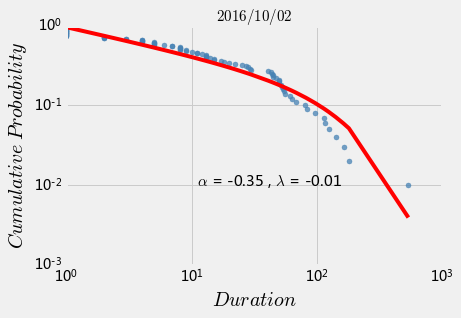

In [81]:
data = af_df.duration[:100]
L,alpha,lambde = powerLawExponentialCutOffPlot(data, '$Duration$', '$Cumulative \;Probability$')
plt.text(min(data)+(max(data)-min(data))/50, 0.01,
         '$\\alpha$ = '+ str(np.round(alpha,2)) + ' , ' \
         + '$\\lambda$ = ' + str(np.round(lambde,2)) , fontsize = 15)
plt.title('$2016/10/02$', fontsize = 15)
plt.show()

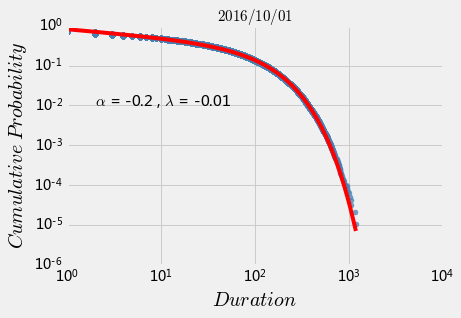

In [83]:
data = af_df['duration'][af_df['day']=='2016-10-01']
L,alpha,lambde = powerLawExponentialCutOffPlot(data, '$Duration$', '$Cumulative \;Probability$')
plt.text(min(data)+(max(data)-min(data))/1000, 0.01,
         '$\\alpha$ = '+ str(np.round(alpha,2)) + ' , ' \
         + '$\\lambda$ = ' + str(np.round(lambde,2)) , fontsize = 15)
plt.title('$2016/10/01$', fontsize = 15)
plt.show()

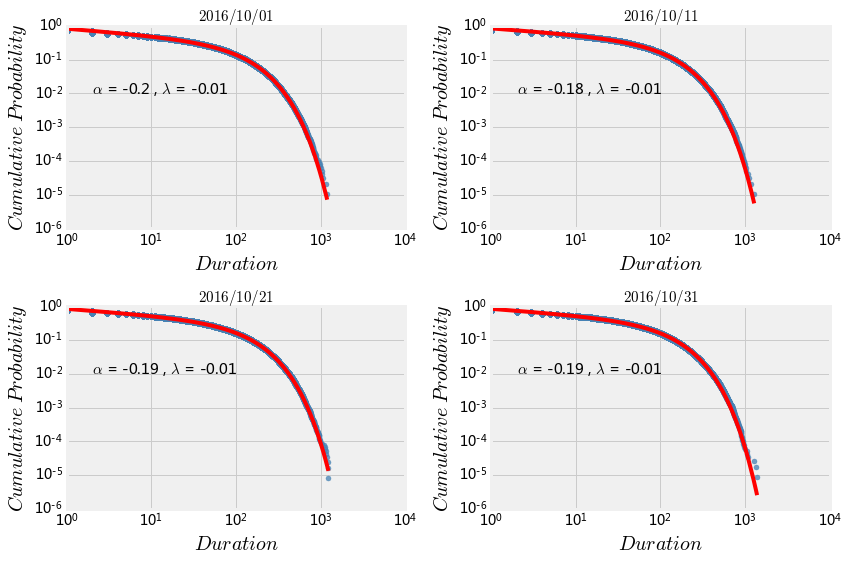

In [84]:
fig = plt.figure(figsize=(12, 8),facecolor='white')
ax = fig.add_subplot(2,2,1)
data = af_df['duration'][af_df['day']=='2016-10-01']
L,alpha,lambde = powerLawExponentialCutOffPlot(data, '$Duration$', '$Cumulative \;Probability$')
plt.text(min(data)+(max(data)-min(data))/1000, 0.01,
         '$\\alpha$ = '+ str(np.round(alpha,2)) + ' , ' \
         + '$\\lambda$ = ' + str(np.round(lambde,2)) , fontsize = 15)
plt.title('$2016/10/01$', fontsize = 15)

ax = fig.add_subplot(2,2,2)
data = af_df['duration'][af_df['day']=='2016-10-11']
L,alpha,lambde = powerLawExponentialCutOffPlot(data, '$Duration$', '$Cumulative \;Probability$')
plt.text(min(data)+(max(data)-min(data))/1000, 0.01,
         '$\\alpha$ = '+ str(np.round(alpha,2)) + ' , ' \
         + '$\\lambda$ = ' + str(np.round(lambde,2)) , fontsize = 15)
plt.title('$2016/10/11$', fontsize = 15)

ax = fig.add_subplot(2,2,3)
data = af_df['duration'][af_df['day']=='2016-10-21']
L,alpha,lambde = powerLawExponentialCutOffPlot(data, '$Duration$', '$Cumulative \;Probability$')
plt.text(min(data)+(max(data)-min(data))/1000, 0.01,
         '$\\alpha$ = '+ str(np.round(alpha,2)) + ' , ' \
         + '$\\lambda$ = ' + str(np.round(lambde,2)) , fontsize = 15)
plt.title('$2016/10/21$', fontsize = 15)

ax = fig.add_subplot(2,2,4)
data = af_df['duration'][af_df['day']=='2016-10-31']
L,alpha,lambde = powerLawExponentialCutOffPlot(data, '$Duration$', '$Cumulative \;Probability$')
plt.text(min(data)+(max(data)-min(data))/1000, 0.01,
         '$\\alpha$ = '+ str(np.round(alpha,2)) + ' , ' \
         + '$\\lambda$ = ' + str(np.round(lambde,2)) , fontsize = 15)
plt.title('$2016/10/31$', fontsize = 15)

plt.tight_layout()


/Users/chengjun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


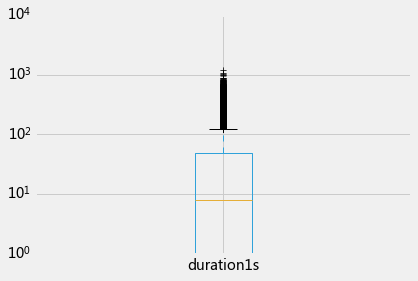

In [178]:
af_df[af_df['day']=='2016-10-01'].boxplot('duration1s')
plt.yscale('log')
plt.show()

In [187]:
np.mean(data), np.percentile(data, 25), np.median(data), np.percentile(data, 75), np.percentile(data, 90)

(30.31, 1.0, 8.0, 43.25, 69.300000000000111)

### 个人的读书时间分布

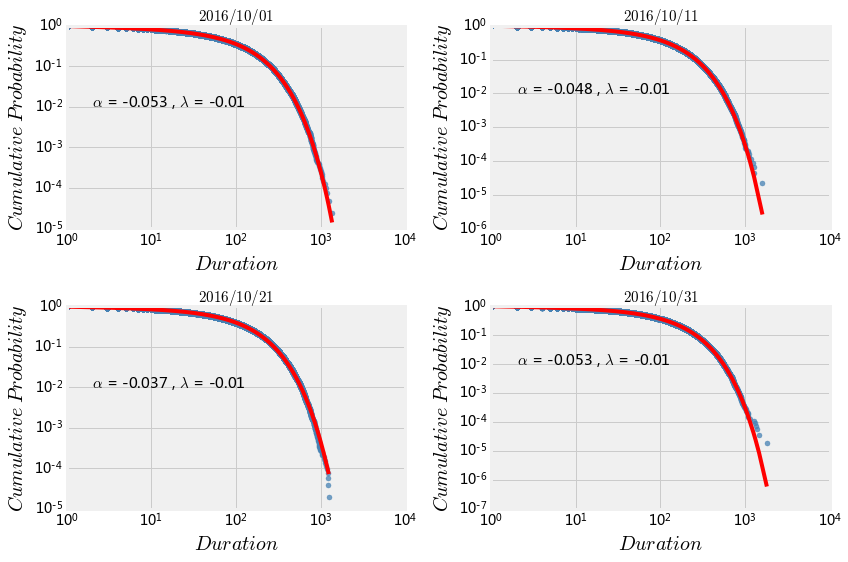

In [85]:
fig = plt.figure(figsize=(12, 8),facecolor='white')
ax = fig.add_subplot(2,2,1)
data = af_df[af_df['day']=='2016-10-01'].groupby('uid').sum()['duration']
L,alpha,lambde = powerLawExponentialCutOffPlot(data, '$Duration$', '$Cumulative \;Probability$')
plt.text(min(data)+(max(data)-min(data))/1000, 0.01,
         '$\\alpha$ = '+ str(np.round(alpha,3)) + ' , ' \
         + '$\\lambda$ = ' + str(np.round(lambde,2)) , fontsize = 15)
plt.title('$2016/10/01$', fontsize = 15)

ax = fig.add_subplot(2,2,2)
data = af_df[af_df['day']=='2016-10-11'].groupby('uid').sum()['duration']
L,alpha,lambde = powerLawExponentialCutOffPlot(data, '$Duration$', '$Cumulative \;Probability$')
plt.text(min(data)+(max(data)-min(data))/1000, 0.01,
         '$\\alpha$ = '+ str(np.round(alpha,3)) + ' , ' \
         + '$\\lambda$ = ' + str(np.round(lambde,2)) , fontsize = 15)
plt.title('$2016/10/11$', fontsize = 15)

ax = fig.add_subplot(2,2,3)
data = af_df[af_df['day']=='2016-10-21'].groupby('uid').sum()['duration']
L,alpha,lambde = powerLawExponentialCutOffPlot(data, '$Duration$', '$Cumulative \;Probability$')
plt.text(min(data)+(max(data)-min(data))/1000, 0.01,
         '$\\alpha$ = '+ str(np.round(alpha,3)) + ' , ' \
         + '$\\lambda$ = ' + str(np.round(lambde,2)) , fontsize = 15)
plt.title('$2016/10/21$', fontsize = 15)

ax = fig.add_subplot(2,2,4)
data = af_df[af_df['day']=='2016-10-31'].groupby('uid').sum()['duration']
L,alpha,lambde = powerLawExponentialCutOffPlot(data, '$Duration$', '$Cumulative \;Probability$')
plt.text(min(data)+(max(data)-min(data))/1000, 0.01,
         '$\\alpha$ = '+ str(np.round(alpha,3)) + ' , ' \
         + '$\\lambda$ = ' + str(np.round(lambde,2)) , fontsize = 15)
plt.title('$2016/10/31$', fontsize = 15)

plt.tight_layout()

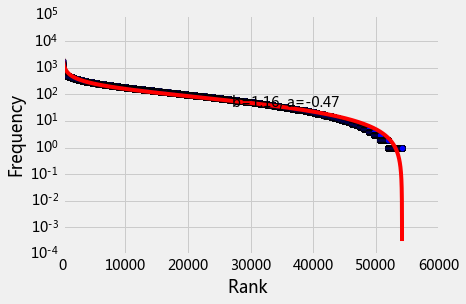

In [195]:
DGBDPlot(data)

## Construct Flow Network

In [120]:
import networkx as nx

def constructFlowNetwork (C):
    '''
    C is an array of two dimentions, e.g., 
    C = np.array([[user1, item1], 
                  [user1, item2], 
                  [user2, item1], 
                  [user2, item3]])
    '''
    E=defaultdict(lambda:0)
    E[('source',C[0][1])]+=1
    E[(C[-1][1],'sink')]+=1
    F=zip(C[:-1],C[1:])
    for i in F:
        if i[0][0]==i[1][0]:
            E[(i[0][1],i[1][1])]+=1
        else:
            E[(i[0][1],'sink')]+=1
            E[('source',i[1][1])]+=1
    G=nx.DiGraph()
    for i,j in E.items():
        x,y=i
        G.add_edge(x,y,weight=j)
    return G

def flowBalancing(G):
    H = G.copy()
    O = G.out_degree(weight='weight')
    I = G.reverse().out_degree(weight='weight')
    for i in O:
        if i =='sink' or i=='source':
            continue
        de = I[i]-O[i]
        if de > 0:
            H.add_edge(i,'sink',weight=de)
        elif de < 0:
            H.add_edge('source',i,weight=-de)
    return H


def networkDissipate(G):
    D=defaultdict(lambda:[0,0,0])#toSink,totalflow,fromSource
    for x,y in G.edges():
        w = G[x][y].values()[0]
        if y == 'sink':
            D[x][0]+=w
        if x != 'source':
            D[x][1]+=w
        elif x == 'source':
            D[y][2]+=w
    return D

In [12]:
af_df[:3]

,uid,book_id,duration,startingtime,day
0,116294,bf6f5580f90f76c660371a28,5764248.0,2016-10-01 00:24:01,2016-10-01
1,116294,c4721243650e52ea55189895,887.0,2016-10-01 21:30:44,2016-10-01
2,116294,bf6f5580f90f76c660371a28,1487263.0,2016-10-01 21:31:20,2016-10-01


In [264]:
C = af_df[['uid', 'book_id', 'duration']][af_df['day']=='2016-10-01']
C[:3]

,uid,book_id,duration
0,116294,bf6f5580f90f76c660371a28,97
1,116294,c4721243650e52ea55189895,1
2,116294,bf6f5580f90f76c660371a28,25


In [279]:
c_groupby = C.groupby('book_id')

c_duration= c_groupby.sum()['duration']   
c_uv = c_groupby['uid'].nunique()

In [281]:
c_duration[:3], c_uv[:3]

(book_id
 0003518d03d8ce2f0166231c    25
 0003bbd56bec0975f465e284     4
 0004cb34a6c30c2259019e49     1
 Name: duration, dtype: int64, book_id
 0003518d03d8ce2f0166231c    1
 0003bbd56bec0975f465e284    3
 0004cb34a6c30c2259019e49    1
 Name: uid, dtype: int64)

In [283]:
c_duration.loc['0003518d03d8ce2f0166231c']

25

In [16]:
C = af_df[['uid', 'book_id']][af_df['day']=='2016-10-01']
C = np.array(C)
g = constructFlowNetwork(C)

In [116]:
h = flowBalancing(g)
nx.info(h)

'Name: \nType: DiGraph\nNumber of nodes: 16577\nNumber of edges: 65699\nAverage in degree:   3.9633\nAverage out degree:   3.9633'

In [282]:
nx.info(g)

'Name: \nType: DiGraph\nNumber of nodes: 16577\nNumber of edges: 65699\nAverage in degree:   3.9633\nAverage out degree:   3.9633'

In [284]:
di = networkDissipate(g)

toSink,totalflow,fromSource = np.array(di.values()).T

toflow = totalflow-toSink
fromflow = totalflow - fromSource

In [165]:
x = map(float, fromflow)/toflow 
y = map(float, fromSource)/toSink 

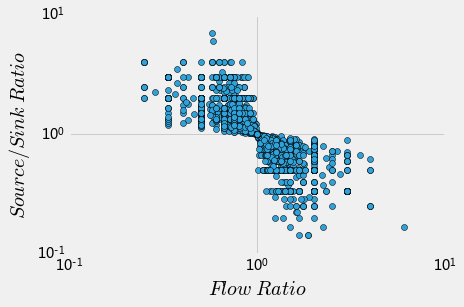

In [166]:
plt.plot(x, y, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$Flow\;Ratio$', fontsize = 20)
plt.ylabel('$Source/Sink\;Ratio$', fontsize = 20)
plt.show()

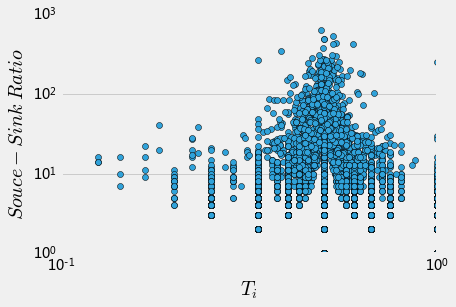

In [158]:
plt.plot(y, totalflow, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$T_i$', fontsize = 20)
plt.ylabel('$Souce-Sink\;Ratio$', fontsize = 20)
plt.show()

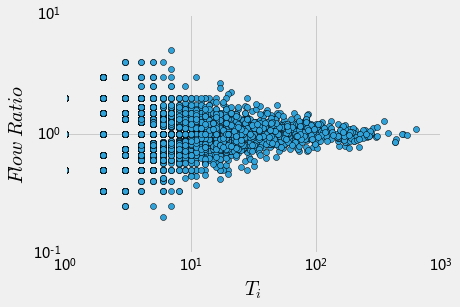

In [152]:
plt.plot(totalflow, x, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$T_i$', fontsize = 20)
plt.ylabel('$Flow\;Ratio$', fontsize = 20)
plt.show()

In [21]:
def log_binning(x, y, bin_count=20):
    max_x = np.log10(max(x))
    max_y = np.log10(max(y))
    max_base = max([max_x,max_y])
    xx = [i for i in x if i>0]
    min_x = np.log10(np.min(xx))
    bins = np.logspace(min_x,max_base,num=bin_count)
    bin_means_y = (np.histogram(x,bins,weights=y)[0] / np.histogram(x,bins)[0])
    bin_means_x = (np.histogram(x,bins,weights=x)[0] / np.histogram(x,bins)[0])
    return bin_means_x,bin_means_y

def alloRegressPlot(xdata,ydata,col,mark,xlab,ylab, loglog):
    ti, di = log_binning(xdata,ydata)
    x=np.log(ti+0.1);y=np.log(di+0.1);
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant=res.params[0];beta=res.params[1]; r2=res.rsquared
    plt.plot(xdata,ydata,mark,color=col, alpha = 0.3)
    plt.plot(ti, di, 'ro')
    xs = np.linspace(min(ti+1),max(ti+1),100)
    plt.plot(xs,np.exp(constant)*xs**beta,color='r',linestyle='-', 
             label = '$\\gamma$ = '+ str(np.round(beta,2)) + ' , ' \
         + '$R^2$ = ' + str(np.round(r2,3)))
    plt.legend(loc = 0)
    if loglog == True:
        plt.xscale('log');plt.yscale('log')
    plt.xlabel(xlab, fontsize = 20);plt.ylabel(ylab, fontsize = 20)
    minx,maxx=plt.xlim(); miny,maxy=plt.ylim()


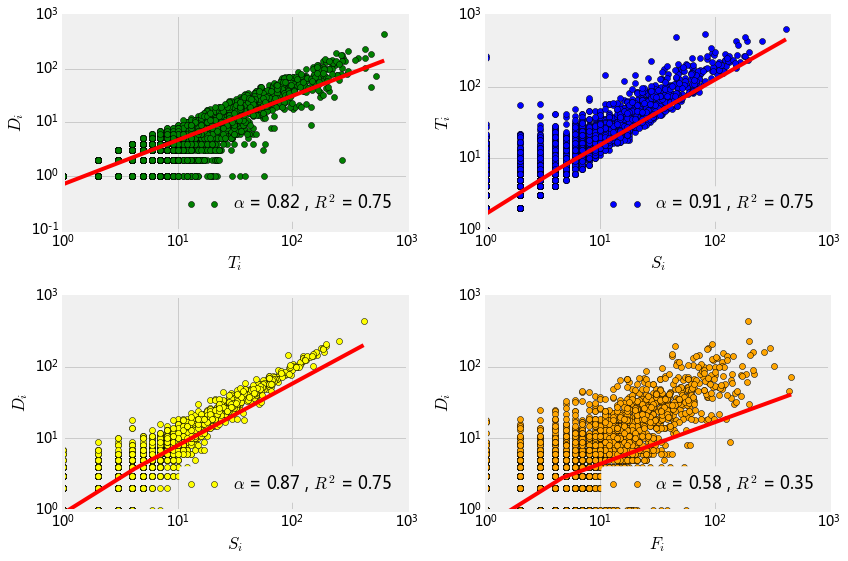

In [190]:
fig = plt.figure(figsize=(12, 8),facecolor='white')
ax = fig.add_subplot(2,2,1)
alloRegressPlot(totalflow,toSink,'g','o','$T_i$','$D_i$', True)
ax = fig.add_subplot(2,2,2)
alloRegressPlot(fromSource,totalflow,'b','o','$S_i$','$T_i$', True)
ax = fig.add_subplot(2,2,3)
alloRegressPlot(fromSource,toSink,'yellow','o','$S_i$','$D_i$', True)
ax = fig.add_subplot(2,2,4)
alloRegressPlot(toflow,toSink,'orange','o','$F_i$','$D_i$', True)
plt.tight_layout()


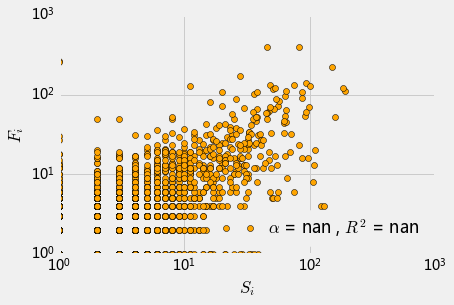

In [86]:
alloRegressPlot(fromSource,toflow,'orange','o','$S_i$','$F_i$', True)


## Flow Distance

In [88]:
from scholarNetwork import scholarNetwork as sn

In [94]:
fd = sn.flowDistanceFromSource(g)

In [285]:
fd.items()[:3]

[('b9592e9cbb68a98270fefa39', 1.9952976476290738),
 ('61a4cf0ace2f0066f433227d', 6.074618708186763),
 ('8b51e02e961afab3e52a050deba8f6fd', 1.0)]

In [286]:
di.items()[:3]

[('b9592e9cbb68a98270fefa39', [1, 5, 3]),
 ('61a4cf0ace2f0066f433227d', [0, 1, 0]),
 ('8b51e02e961afab3e52a050deba8f6fd', [1, 1, 1])]

In [288]:
for i in di:
    for j in [fd[i], c_duration.loc[i], c_uv.loc[i]]:
        di[i].append(j)

In [289]:
di.items()[:3]

[('b9592e9cbb68a98270fefa39', [1, 5, 3, 1.9952976476290738, 123, 4]),
 ('61a4cf0ace2f0066f433227d', [0, 1, 0, 6.074618708186763, 22, 1]),
 ('8b51e02e961afab3e52a050deba8f6fd', [1, 1, 1, 1.0, 56, 1])]

In [290]:
toSink,totalflow,fromSource, flowdistance, duration_i, uv_i = np.array(di.values()).T
toflow = totalflow-toSink
fromflow = totalflow - fromSource

In [292]:
def alloRegressPlot(xdata,ydata,col,mark,xlab,ylab, loglog):
    x=np.log(xdata+1);y=np.log(ydata+1);
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant=res.params[0];beta=res.params[1]; r2=res.rsquared
    plt.plot(xdata,ydata,mark,color=col, 
            label = '$\\alpha$ = '+ str(np.round(beta,2)) + ' , ' \
         + '$R^2$ = ' + str(np.round(r2,2)))
    if loglog == True:
        plt.xscale('log');plt.yscale('log')
    plt.xlabel(xlab);plt.ylabel(ylab)
    minx,maxx=plt.xlim(); miny,maxy=plt.ylim()
    xs = np.linspace(min(xdata),max(xdata),100)
    plt.plot(xs,np.exp(constant)*xs**beta,color='r',linestyle='-')
    plt.legend(loc = 0)

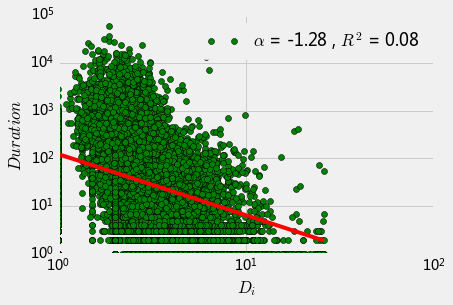

In [296]:
alloRegressPlot(flowdistance,duration_i,'g','o','$D_i$','$Duration$', True)

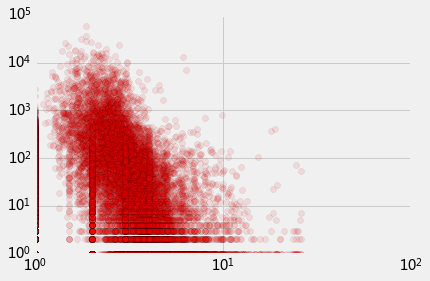

In [304]:
plt.plot(flowdistance, duration_i,'ro', alpha = .1)
plt.xscale('log')
plt.yscale('log')
plt.show()

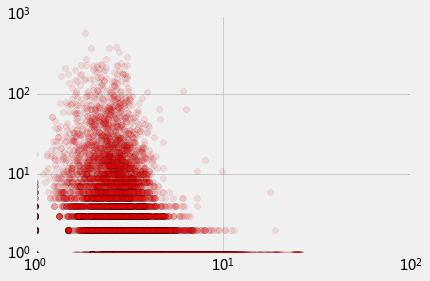

In [303]:
plt.plot(flowdistance,uv_i,'ro', alpha = .1)
plt.xscale('log')
plt.yscale('log')
plt.show()

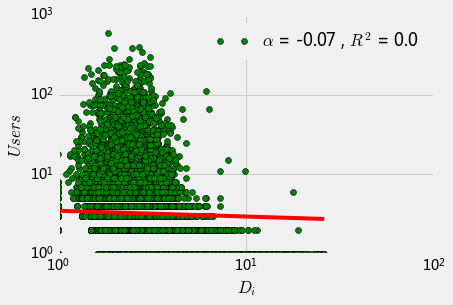

In [297]:
alloRegressPlot(flowdistance,uv_i,'g','o','$D_i$','$Users$', True)

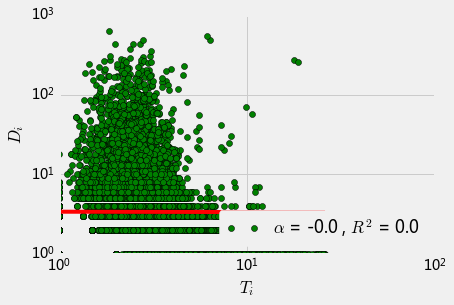

In [186]:
alloRegressPlot(flowdistance,totalflow,'g','o','$T_i$','$D_i$', True)

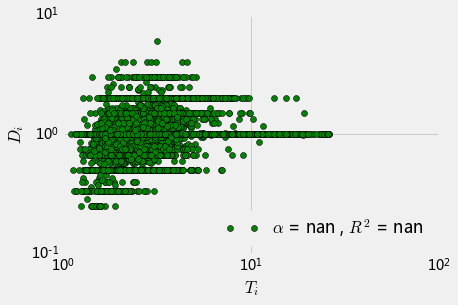

In [187]:
alloRegressPlot(flowdistance,x,'g','o','$T_i$','$D_i$', True)


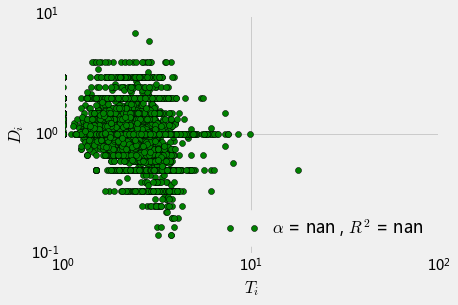

In [188]:
alloRegressPlot(flowdistance,y,'g','o','$T_i$','$D_i$', True)


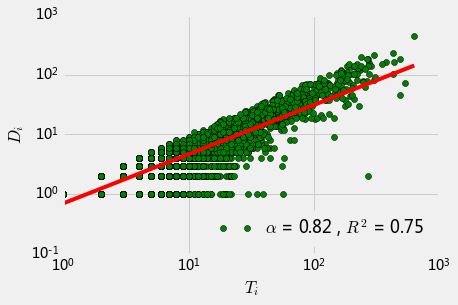

In [189]:
alloRegressPlot(totalflow,toSink,'g','o','$T_i$','$D_i$', True)


## Fragmentation

In [192]:
# def herfindahl_hirschman_index(df):
#     X_duration = df['duration'].sum()
#     X_i = df.groupby('book_id')['duration'].sum()
#     HHI = ((np.array(X_i) / float(X_duration)) ** 2).sum()
#     return HHI

# def gini_coefficient(v):
#     bins = np.linspace(0., 100., 11)
#     total = float(np.sum(v))
#     yvals = []
#     for b in bins:
#         bin_vals = v[v <= np.percentile(v, b)]
#         bin_fraction = (np.sum(bin_vals) / total) * 100.0
#         yvals.append(bin_fraction)
#     # perfect equality area
#     pe_area = np.trapz(bins, x=bins)
#     # lorenz area
#     lorenz_area = np.trapz(yvals, x=bins)
#     gini_val = (pe_area - lorenz_area) / float(pe_area)
#     return bins, yvals, gini_val

# v = df.groupby('book_id')['duration'].sum()

In [238]:
def herfindahl_hirschman_index(loc_index):
    X_i = pv.loc[loc_index]
    X_duration = X_i.sum()
    HHI = ((np.array(X_i) / float(X_duration)) ** 2).sum()
    return HHI

def gini_coefficient(loc_index):
    v = pv.loc[loc_index]
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

In [260]:
len(v)

16575

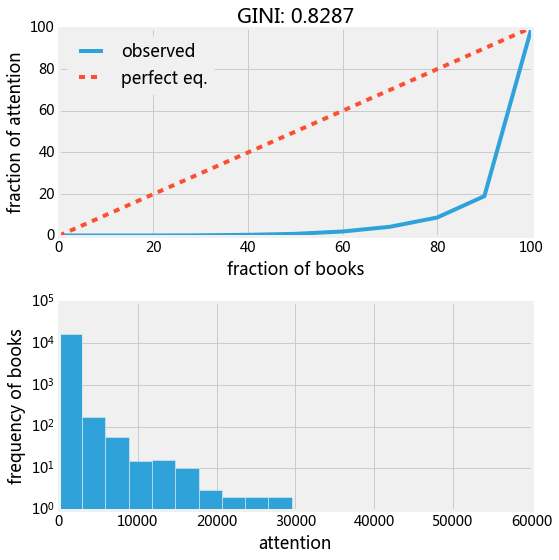

In [259]:
v = pv.loc[days[0]]
bins, result, gini_val = gini_coefficient(days[0])
fig = plt.figure(figsize=(8, 8),facecolor='white')

plt.subplot(2, 1, 1)
plt.plot(bins, result, label="observed")
plt.plot(bins, bins, '--', label="perfect eq.")
plt.xlabel("fraction of books")
plt.ylabel("fraction of attention")
plt.title("GINI: %.4f" %(gini_val))
plt.legend(loc=0)

plt.subplot(2, 1, 2)
plt.hist(v, bins=20)
plt.xlabel("attention")
plt.ylabel("frequency of books")
plt.yscale('log')
fig.tight_layout()


In [227]:
X_i = pv.loc[days[0]]
X_duration = X_i.sum()
((np.array(X_i) / float(X_duration)) ** 2).sum()


0.0014808004296178127

In [239]:
hhi_list = [herfindahl_hirschman_index(i) for i in days]
gini_list = [gini_coefficient(i)[2] for i in days]

In [255]:
days[:3]

array(['2016-10-01', '2016-10-02', '2016-10-03'], dtype=object)

In [234]:
dates = [datetime.datetime.strptime(i, '%Y-%m-%d') for i in days]

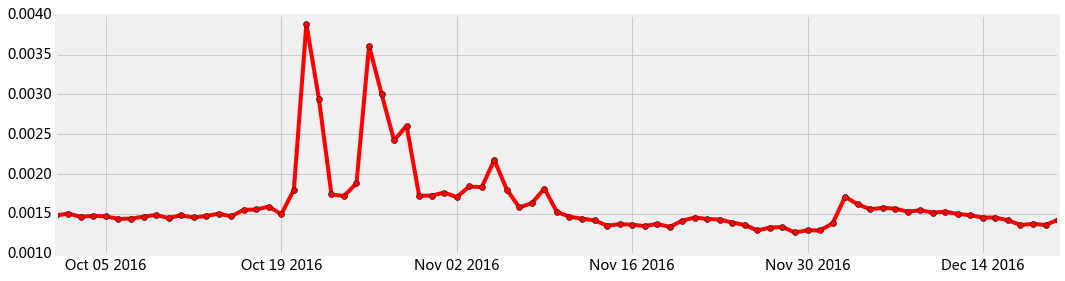

In [237]:
fig = plt.figure(figsize=(16, 4),facecolor='white')

plt.plot(dates, hhi_list, 'r-o')
plt.show()

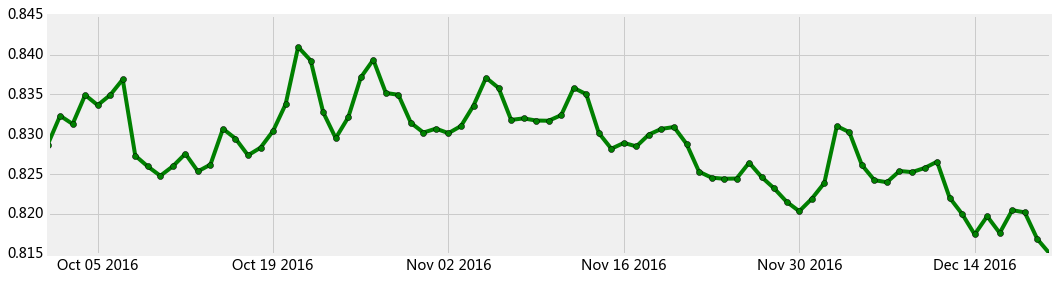

In [240]:
fig = plt.figure(figsize=(16, 4),facecolor='white')

plt.plot(dates, gini_list, 'g-o')
plt.show()

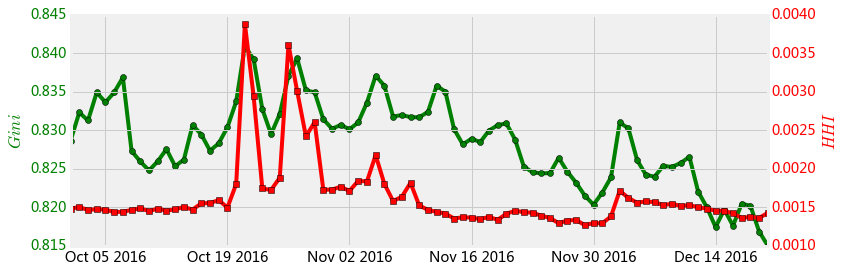

In [261]:
fig = plt.figure(figsize=(12, 4),facecolor='white')
ax1 = fig.add_subplot(1,1,1)

ax1.plot(dates, gini_list, 'g-o')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('$Gini$', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()
ax2.plot(dates, hhi_list, 'r-s')
ax2.set_ylabel('$HHI$', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

### Freeman Centralization

The ''centralization'' of any network is a measure of how central its most central node is in relation to how central all the other nodes are.

> Freeman, Linton C. (1979), "centrality in social networks: Conceptual clarification" (PDF), Social Networks, 1 (3): 215–239, doi:10.1016/0378-8733(78)90021-7

Centralization measures then (a) calculate the sum in differences in centrality between the most central node in a network and all other nodes; and (b) divide this quantity by the theoretically largest such sum of differences in any network of the same size.  Thus, every centrality measure can have its own centralization measure.  

Defined formally, 

- if $C_x(p_i)$ is any centrality measure of point $i$, 
- if $C_x(p_*)$ is the largest such measure in the network, 
- and if $\max \sum_{i=1}^{N} C_x(p_*)-C_x(p_i)$ is the largest sum of differences in point centrality $C_x$ for **any graph** with the same number of nodes, (one node dominates the network, a star network)

then the centralization of the network is:

$$C_x=\frac{\sum_{i=1}^{N} C_x(p_*)-C_x(p_i)}{\max \sum_{i=1}^{N} C_x(p_*)-C_x(p_i)}$$

https://en.wikipedia.org/wiki/Centrality#Freeman_Centralization

http://faculty.ucr.edu/~hanneman/nettext/C10_Centrality.html#Freeman


In [306]:
C_df = af_df[['uid', 'book_id']][af_df['day']=='2016-10-01']
C = np.array(C_df)
g = constructFlowNetwork(C)

In [311]:
user_sum = float(C_df['uid'].nunique())
book_groups = C_df.groupby('book_id')['uid'].groups
book_groups['b9592e9cbb68a98270fefa39']

[69571, 75912, 80003, 80666, 80676]

In [312]:
nx.info(g)

'Name: \nType: DiGraph\nNumber of nodes: 16577\nNumber of edges: 65699\nAverage in degree:   3.9633\nAverage out degree:   3.9633'

In [314]:
G=nx.Graph()
for edge in g.edges():
    if 'sink' not in edge and 'source' not in edge:
        observed_duplication = len(set(C_df['uid'].iloc[book_groups[edge[0]]]) \
                           & set(C_df['uid'].iloc[book_groups[edge[1]]])) / user_sum
        expected_duplication = (len(book_groups[edge[0]])/user_sum) * (len(book_groups[edge[1]])/user_sum)
        if  observed_duplication >= expected_duplication:
            G.add_edge(edge[0], edge[1])

In [315]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 14263\nNumber of edges: 41018\nAverage degree:   5.7517'

In [316]:
degree_centrality = nx.degree_centrality(G)

In [355]:
print degree_centrality['b9592e9cbb68a98270fefa39']

print G.degree('b9592e9cbb68a98270fefa39')/float(len(G.nodes())-1)

0.000350581966064
0.000350581966064


In [365]:
def powerRankPlot(data):
    t = np.array(sorted(data,key=lambda x:-x))
    r = np.array(range(len(data))) +1
    x = np.log(r)
    y = np.log(t)
#     xx = sm.add_constant(x, prepend=True)
#     res = sm.OLS(y,xx).fit()
#     constant, beta = res.params
#     r2 = res.rsquared
    plt.plot(r,t, 'b-')
#     plt.plot(r, np.exp(constant+x*beta),"red")
#     plt.text(min(r)+(max(r)-min(r))/10, min(t)+(max(t)-min(t))/2,  
#              'Beta = ' + str(np.round(beta,2)) + '\n' + 'R squared = ' + str(np.round(r2, 2)))
    plt.xscale('log'); plt.yscale('log')
    plt.xlabel(r'Rank')
    plt.ylabel(r'Frequency')

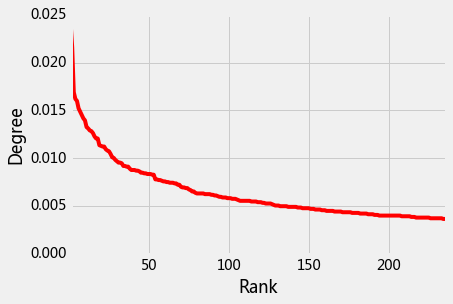

In [368]:
data = degree_centrality.values()
t = np.array(sorted(data,key=lambda x:-x))
r = np.array(range(len(data))) +1
plt.plot(r,t, 'r-')
# plt.xscale('log'); plt.yscale('log')
plt.xlim([1, 236])
plt.xlabel(r'Rank')
plt.ylabel(r'Degree')
plt.show()

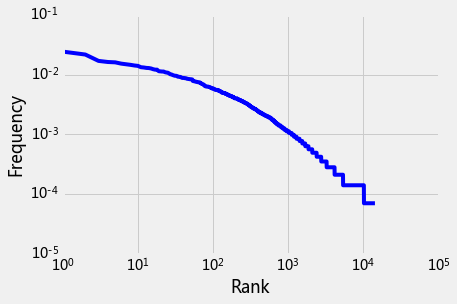

In [367]:
powerRankPlot(degree_centrality.values())

In [417]:
data = degree_centrality.values()
max_data = np.max(data)

network_centrality_score_sum = 0
for i in data:
    network_centrality_score_sum += max_data - i
print network_centrality_score_sum

max_network_centrality_score_sum = (1 - 1.0/(len(data)-1))*(len(data)-1)
print max_network_centrality_score_sum

network_centrality_score = network_centrality_score_sum/max_network_centrality_score_sum
print network_centrality_score

339.272121722
14261.0
0.0237902055762


In [1]:
def gini_coefficient(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

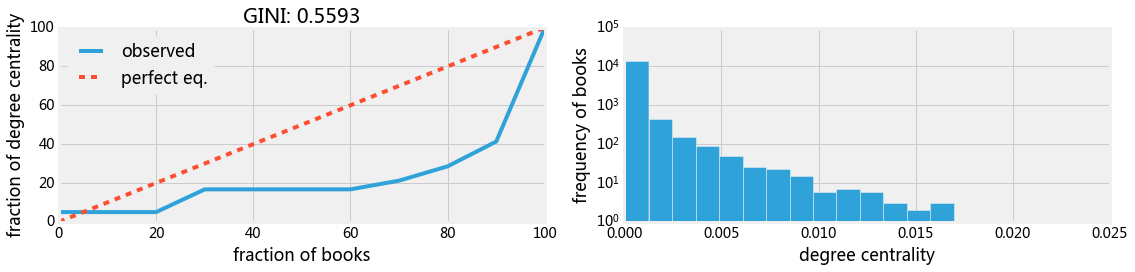

In [452]:
bins, result, gini_val = gini_coefficient(np.array(data))
fig = plt.figure(figsize=(16, 4),facecolor='white')

plt.subplot(1, 2, 1)
plt.plot(bins, result, label="observed")
plt.plot(bins, bins, '--', label="perfect eq.")
plt.xlabel("fraction of books")
plt.ylabel("fraction of degree centrality")
plt.title("GINI: %.4f" %(gini_val))
plt.legend(loc=0)

plt.subplot(1, 2, 2)
plt.hist(data, bins=20)
plt.xlabel("degree centrality")
plt.ylabel("frequency of books")
plt.yscale('log')
fig.tight_layout()


In [4]:
import numpy as np
bins, result, gini_val = gini_coefficient(np.array([10,20, 5,3,2,1,11]))

In [5]:
gini_val

0.47884615384615392

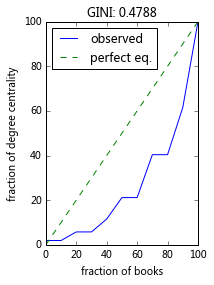

In [8]:
plt.subplot(1, 2, 1)
plt.plot(bins, result, label="observed")
plt.plot(bins, bins, '--', label="perfect eq.")
plt.xlabel("fraction of books")
plt.ylabel("fraction of degree centrality")
plt.title("GINI: %.4f" %(gini_val))
plt.legend(loc=0)
plt.show()

# using entropy to measure fragmentation

# Pytorch

In [2]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [3]:
torch.manual_seed(1)    # reproducible

# Hyper Parameters
TIME_STEP = 10      # rnn time step
INPUT_SIZE = 1      # rnn input size
LR = 0.02           # learning rate

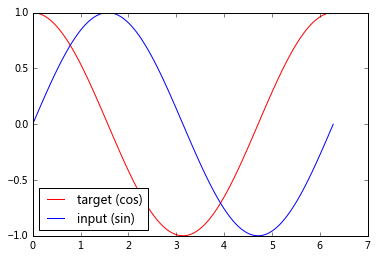

In [4]:
# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)    # float32 for converting torch FloatTensor
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()


In [7]:
x_train = np.array([[73.,80.,75.],[93.,88.,93.],[89.,91.,90.],[96.,98.,100.],[73.,63.,70.]],dtype=np.float32)
x_train

array([[  73.,   80.,   75.],
       [  93.,   88.,   93.],
       [  89.,   91.,   90.],
       [  96.,   98.,  100.],
       [  73.,   63.,   70.]], dtype=float32)

In [8]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)

        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

        # instead, for simplicity, you can replace above codes by follows
        # r_out = r_out.view(-1, 32)
        # outs = self.out(r_out)
        # return outs, h_state

rnn = RNN()
print(rnn)



RNN (
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear (32 -> 1)
)


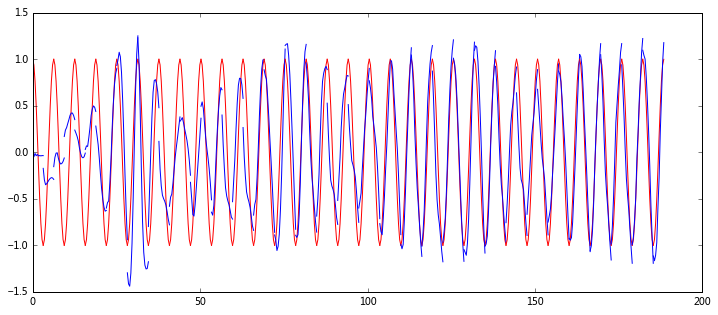

In [9]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all rnn parameters
loss_func = nn.MSELoss()

h_state = None      # for initial hidden state

plt.figure(1, figsize=(12, 5))
plt.ion()           # continuously plot

for step in range(60):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps)    # float32 for converting torch FloatTensor
    y_np = np.cos(steps)

    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))    # shape (batch, time_step, input_size)
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))

    prediction, h_state = rnn(x, h_state)   # rnn output
    # !! next step is important !!
    h_state = Variable(h_state.data)        # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # cross entropy loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()

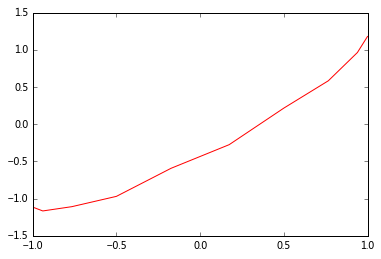

In [11]:
# plotting
plt.plot( y_np.flatten(),prediction.data.numpy().flatten(), 'r-')
plt.show()

In [12]:
import torchvision

In [13]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
-1161.5027
  612.5032
  523.2523
[torch.FloatTensor of size 3]



In [14]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]



In [17]:
import torch
from torch.autograd import Variable # torch 中 Variable 模块

# 先生鸡蛋
tensor = torch.FloatTensor([[1,2],[3,4]])
# 把鸡蛋放到篮子里, requires_grad是参不参与误差反向传播, 要不要计算梯度
variable = Variable(tensor, requires_grad=True)
print(tensor)
print(variable)


 1  2
 3  4
[torch.FloatTensor of size 2x2]

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]



In [21]:
t_out = torch.mean(tensor*tensor)       # x^2
v_out = torch.mean(variable*variable)   # x^2
print(t_out)
print(v_out)    # 7.5

7.5
Variable containing:
 7.5000
[torch.FloatTensor of size 1]



In [22]:
v_out.backward()    # 模拟 v_out 的误差反向传递

# 下面两步看不懂没关系, 只要知道 Variable 是计算图的一部分, 可以用来传递误差就好.
# v_out = 1/4 * sum(variable*variable) 这是计算图中的 v_out 计算步骤
# 针对于 v_out 的梯度就是, d(v_out)/d(variable) = 1/4*2*variable = variable/2

print(variable.grad)    # 初始 Variable 的梯度
print(v_out)

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]

Variable containing:
 7.5000
[torch.FloatTensor of size 1]



# Actual entropy

In [1]:
function E=lzentropy(rd)
 
n=length(rd);
L=zeros(1,n);
L(1)=1;
 
for i=2:n
 
    sub=rd(i);              
 
    match=rd(1:i-1)==sub;   
 
    if all(match==0)==1     
        L(i)=1;
    else                    
        k=1;
 
        while k<i  
 
            if i+k>n      
                L(i)=0;
                break
            end
 
            sub=rd(i:i+k);  
 
            for j=1:i-1      
 
                match=rd(j:j+length(sub)-1)==sub;
 
                if all(match==1)==1
                    break;
                end
            end
 
            L(i)=length(sub);
            if all(match==1)==0
                k=i;
            end
            k=k+1;
        end
    end
end
 
E=1/(1/n * sum(L))*log(n);
 
end

SyntaxError: invalid syntax (<ipython-input-1-d0400401cbb1>, line 1)

In [3]:
set([1, 2, 3]).issubset([1, 2])

False

In [4]:
if [1, 2] in [1, 2, 3]:
    print 'true'
else:
    print 'false'

false


In [17]:
lst = [1, 2, 3, 5]
sublst = [2,3]
def contains_sublist(lst, sublst):
    n = len(sublst)
    return any((sublst == lst[i:i+n]) for i in xrange(len(lst)-n+1))

contains_sublist(lst, sublst)

True

In [13]:
def contains(small, big):
    for i in range(len(big)-len(small)+1):
        if big[i:i+len(small)] == small:
            return True
    return False
contains(lst, sublst)

False

In [11]:
%time contains(lst, sublst)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


False

In [14]:
%time contains_sublist(lst, sublst)

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 13.1 µs


True